In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsla-new-dataset/Tsla Dataset New(Sheet1).csv


In [2]:
#Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
Tsla = pd.read_csv('/kaggle/input/tsla-new-dataset/Tsla Dataset New(Sheet1).csv')
Tsla 

Date Close/Last
0     12/12/2024   $418.10 
1     12/11/2024   $424.77 
2     12/10/2024   $400.99 
3      12/9/2024   $389.79 
4      12/6/2024   $389.22 
...          ...        ...
1253         NaN        NaN
1254         NaN        NaN
1255         NaN        NaN
1256         NaN        NaN
1257         NaN        NaN

[1258 rows x 2 columns]

# Data Pre-processing

In [4]:
Tsla.info

<bound method DataFrame.info of             Date Close/Last
0     12/12/2024   $418.10 
1     12/11/2024   $424.77 
2     12/10/2024   $400.99 
3      12/9/2024   $389.79 
4      12/6/2024   $389.22 
...          ...        ...
1253         NaN        NaN
1254         NaN        NaN
1255         NaN        NaN
1256         NaN        NaN
1257         NaN        NaN

[1258 rows x 2 columns]>

In [5]:
Tsla.describe()

Date Close/Last
count         1246       1246
unique        1246       1212
top     12/12/2024   $194.70 
freq             1          2

In [6]:
Tsla.tail()

Date Close/Last
1253  NaN        NaN
1254  NaN        NaN
1255  NaN        NaN
1256  NaN        NaN
1257  NaN        NaN

In [7]:
Tsla.isnull().tail(5)

Date  Close/Last
1253  True        True
1254  True        True
1255  True        True
1256  True        True
1257  True        True

In [8]:
Tsla.isnull().sum()

Date          12
Close/Last    12
dtype: int64

In [9]:
Tsla = Tsla.dropna() 

In [10]:
Tsla

Date Close/Last
0     12/12/2024   $418.10 
1     12/11/2024   $424.77 
2     12/10/2024   $400.99 
3      12/9/2024   $389.79 
4      12/6/2024   $389.22 
...          ...        ...
1241    1/8/2020    $32.81 
1242    1/7/2020    $31.27 
1243    1/6/2020    $30.10 
1244    1/3/2020    $29.53 
1245    1/2/2020    $28.68 

[1246 rows x 2 columns]

In [11]:
Tsla['Date'] = pd.to_datetime(Tsla['Date'], infer_datetime_format=True)
Tsla = Tsla.set_index(['Date'])

<ipython-input-11-f222267ed7b5>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Tsla['Date'] = pd.to_datetime(Tsla['Date'], infer_datetime_format=True)
<ipython-input-11-f222267ed7b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tsla['Date'] = pd.to_datetime(Tsla['Date'], infer_datetime_format=True)


In [12]:
Tsla['Close/Last'] = Tsla['Close/Last'].replace({'\$': ''}, regex=True).astype(float)

In [13]:
Tsla1 = Tsla.resample('MS').mean()

In [14]:
print(Tsla1.columns)

Index(['Close/Last'], dtype='object')


In [15]:
Tsla1.rename(columns={'Date': 'Date', 'Close/Last': 'Closing Price'}, inplace=True)
Tsla1

Closing Price
Date                     
2020-01-01      35.242857
2020-02-01      53.164211
2020-03-01      37.272727
2020-04-01      44.240476
2020-05-01      53.295000
2020-06-01      64.236818
2020-07-01      97.343182
2020-08-01     120.021429
2020-09-01     137.830952
2020-10-01     142.403182
2020-11-01     155.203500
2020-12-01     212.939545
2021-01-01     276.258947
2021-02-01     264.757368
2021-03-01     218.934348
2021-04-01     236.539048
2021-05-01     205.584000
2021-06-01     208.973636
2021-07-01     219.711905
2021-08-01     235.080455
2021-09-01     251.317143
2021-10-01     292.783333
2021-11-01     373.554286
2021-12-01     339.629545
2022-01-01     336.723000
2022-02-01     292.962632
2022-03-01     304.793043
2022-04-01     332.462000
2022-05-01     255.223333
2022-06-01     234.026667
2022-07-01     251.394000
2022-08-01     294.870000
2022-09-01     288.734762
2022-10-01     223.810476
2022-11-01     191.246667
2022-12-01     152.970476
2023-01-01     134.196000
2023-02-01     199.775263
2023-03-01     188.522609
2023-04-01     176.955263
2023-05-01     175.799091
2023-06-01     246.090476
2023-07-01     273.505500
2023-08-01     242.333043
2023-09-01     256.968000
2023-10-01     236.907727
2023-11-01     229.411905
2023-12-01     247.138000
2024-01-01     216.130476
2024-02-01     192.793000
2024-03-01     176.163000
2024-04-01     165.872273
2024-05-01     177.231818
2024-06-01     182.220000
2024-07-01     240.621364
2024-08-01     209.010909
2024-09-01     235.160000
2024-10-01     238.780435
2024-11-01     318.219500
2024-12-01     384.311111

In [16]:
Tsla1.count()

Closing Price    60
dtype: int64

In [17]:
Tsla1['Closing Price'] = Tsla1['Closing Price'].round(3)
Tsla1

Closing Price
Date                     
2020-01-01         35.243
2020-02-01         53.164
2020-03-01         37.273
2020-04-01         44.240
2020-05-01         53.295
2020-06-01         64.237
2020-07-01         97.343
2020-08-01        120.021
2020-09-01        137.831
2020-10-01        142.403
2020-11-01        155.204
2020-12-01        212.940
2021-01-01        276.259
2021-02-01        264.757
2021-03-01        218.934
2021-04-01        236.539
2021-05-01        205.584
2021-06-01        208.974
2021-07-01        219.712
2021-08-01        235.080
2021-09-01        251.317
2021-10-01        292.783
2021-11-01        373.554
2021-12-01        339.630
2022-01-01        336.723
2022-02-01        292.963
2022-03-01        304.793
2022-04-01        332.462
2022-05-01        255.223
2022-06-01        234.027
2022-07-01        251.394
2022-08-01        294.870
2022-09-01        288.735
2022-10-01        223.810
2022-11-01        191.247
2022-12-01        152.970
2023-01-01        134.196
2023-02-01        199.775
2023-03-01        188.523
2023-04-01        176.955
2023-05-01        175.799
2023-06-01        246.090
2023-07-01        273.506
2023-08-01        242.333
2023-09-01        256.968
2023-10-01        236.908
2023-11-01        229.412
2023-12-01        247.138
2024-01-01        216.130
2024-02-01        192.793
2024-03-01        176.163
2024-04-01        165.872
2024-05-01        177.232
2024-06-01        182.220
2024-07-01        240.621
2024-08-01        209.011
2024-09-01        235.160
2024-10-01        238.780
2024-11-01        318.220
2024-12-01        384.311

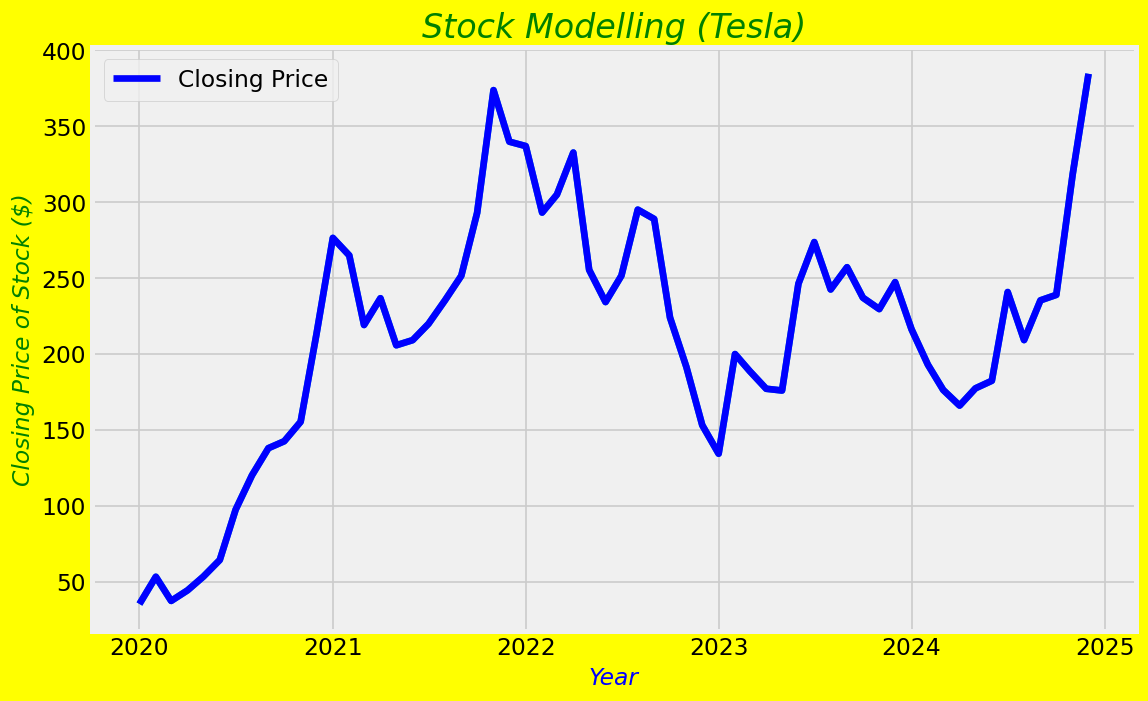

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(3, figsize = (10,6), dpi=120, facecolor='Yellow',edgecolor='black')
plt.xlabel ('Year', color = 'Blue', fontdict = {'fontname':'constantia', 'fontstyle':'italic', 'fontsize':14})
plt.ylabel ('Closing Price of Stock ($)', color = 'Green', fontdict = {'fontname':'constantia', 'fontstyle':'italic', 'fontsize':14})
plt.title ('Stock Modelling (Tesla)', color = 'Green', fontdict = {'fontname':'constantia', 'fontstyle':'italic', 'fontsize':20})
plt.plot(Tsla1)
plt.plot(Tsla1.index, Tsla1['Closing Price'], color='blue', label='Closing Price')
plt.legend()
plt.show()


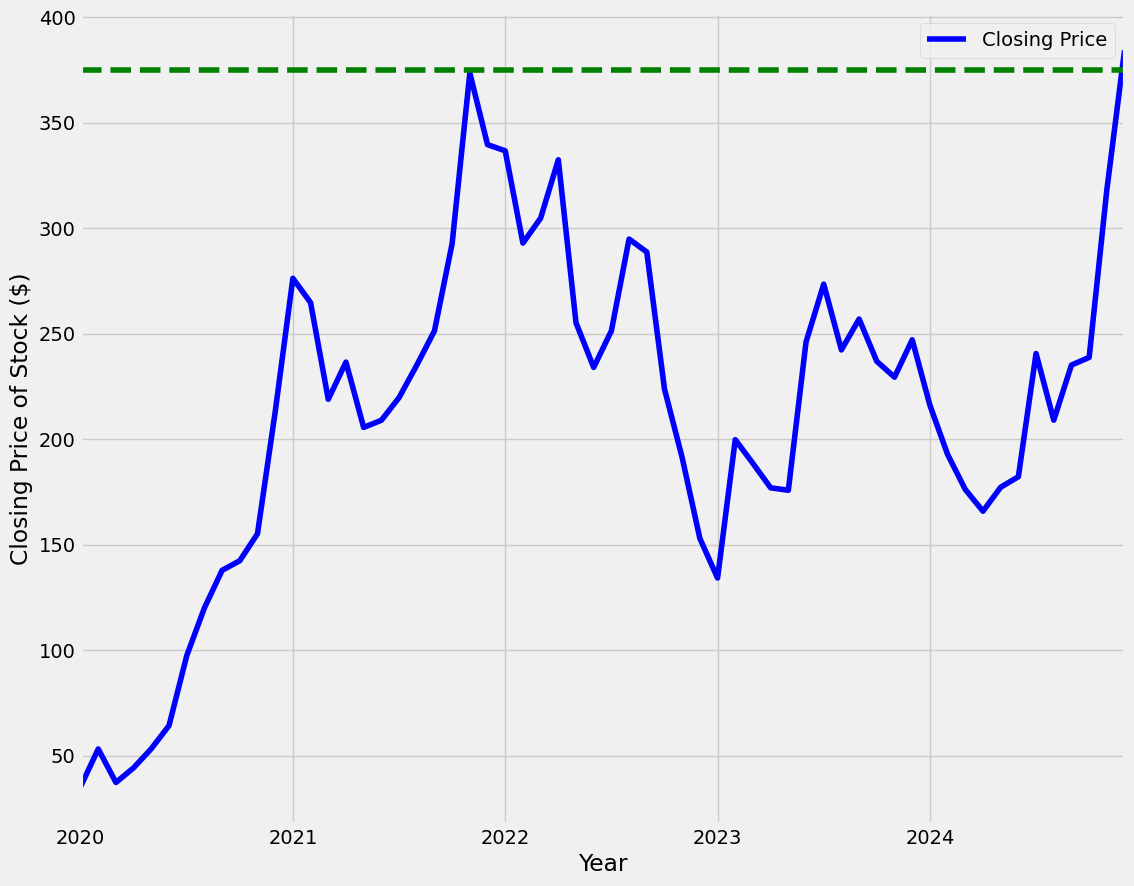

In [19]:
ax = Tsla1.plot(color='blue', figsize=(12,10))
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price of Stock ($)')
ax.axhline(375, color='green', linestyle='--')
ax.axvspan (2021,2022, color = 'gray', alpha = 0.5)

## ACF/PACF

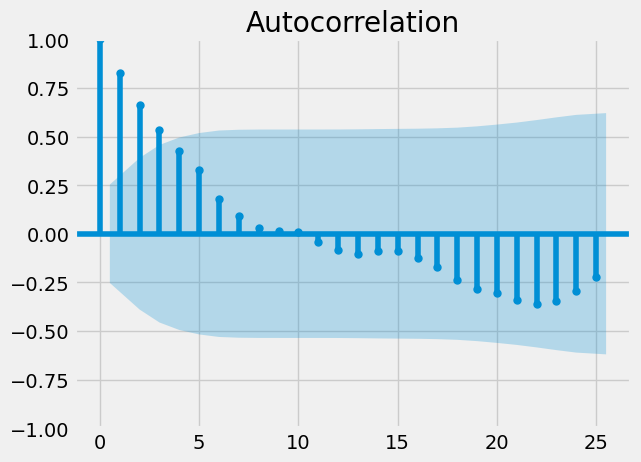

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(Tsla1['Closing Price'], lags=25)
plt.show()

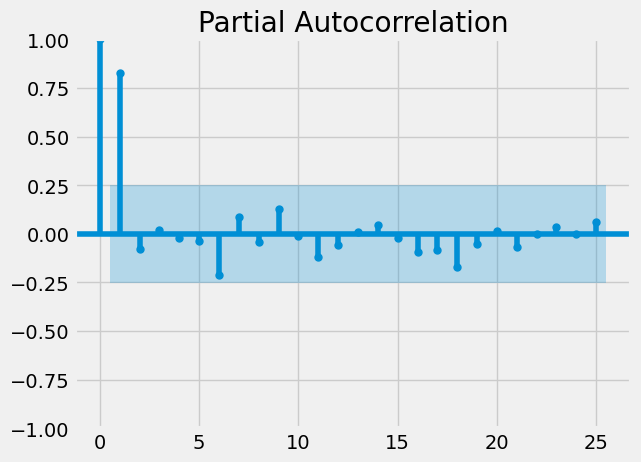

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(Tsla1['Closing Price'], lags=25)
plt.show()

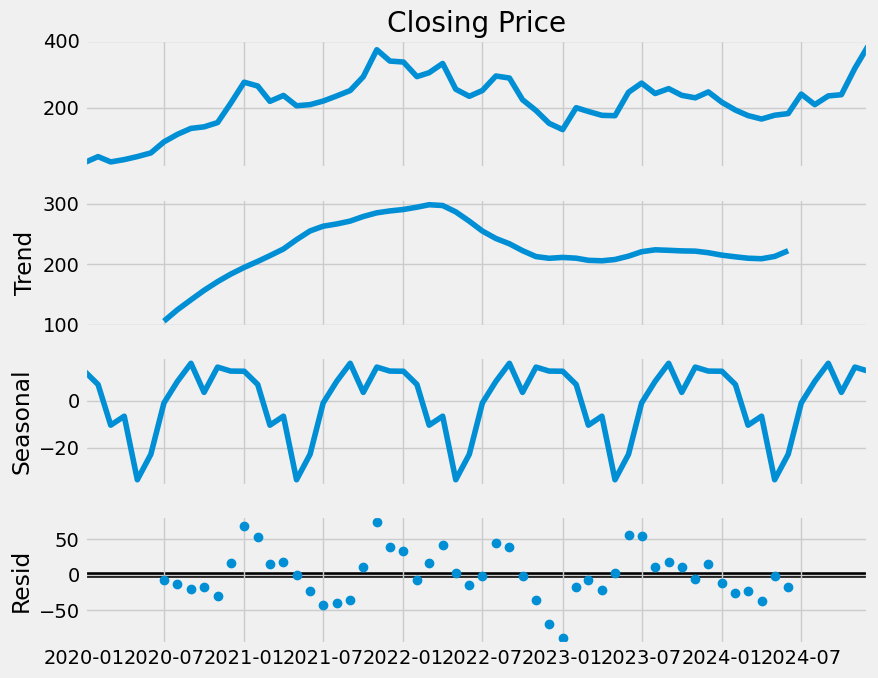

In [22]:
from pylab import rcParams
plt.rcParams['figure.figsize'] = 9, 7  # resizing the image to be big enough for us 

decomposition = sm.tsa.seasonal_decompose(Tsla1['Closing Price'], period = 12)
fig = decomposition.plot()
plt.show()

# Additive Decomposition

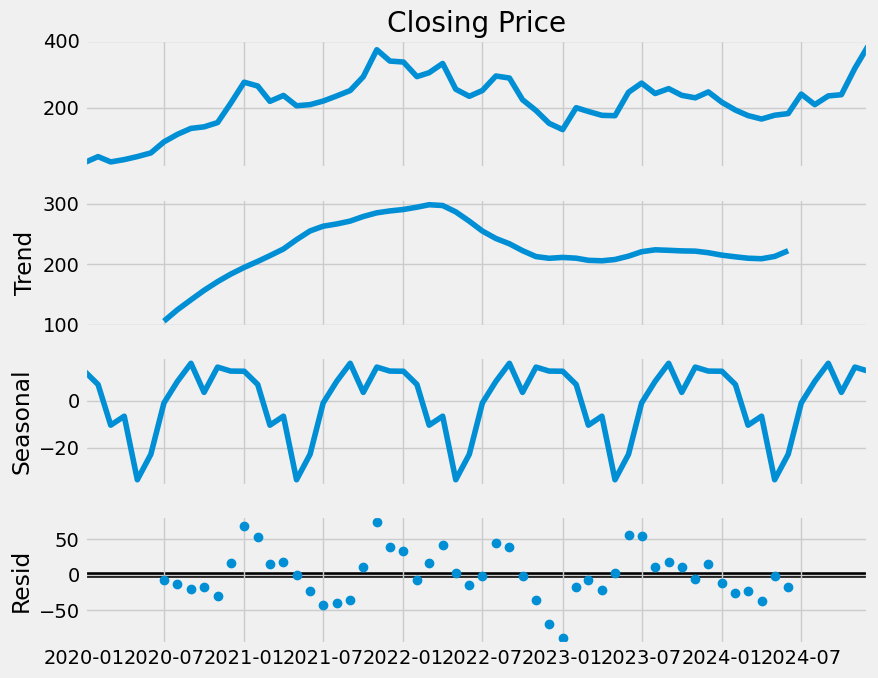

In [23]:
#Time series decomposition
rcParams['figure.figsize'] = 9, 7  # resizing the image to be big enough for us 

decomposition = sm.tsa.seasonal_decompose(Tsla1['Closing Price'], model='additive', period = 12)
fig = decomposition.plot()
plt.show()

# Multiplicative Decomposition

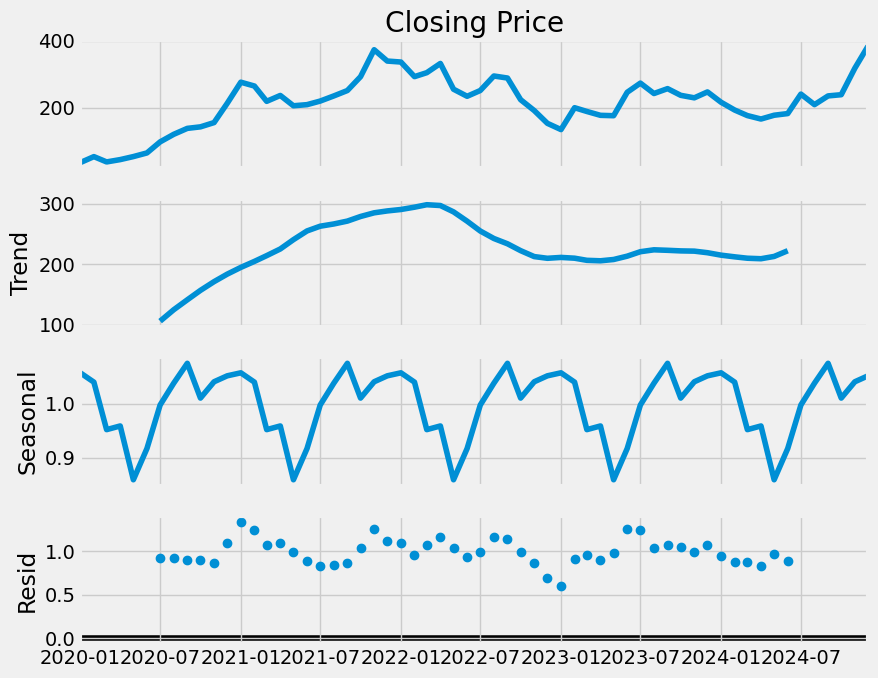

In [24]:
rcParams['figure.figsize'] = 9, 7  # resizing the image to be big enough for us 

decomposition = sm.tsa.seasonal_decompose(Tsla1['Closing Price'], model='multiplicative', period = 12)
fig = decomposition.plot()
plt.show()

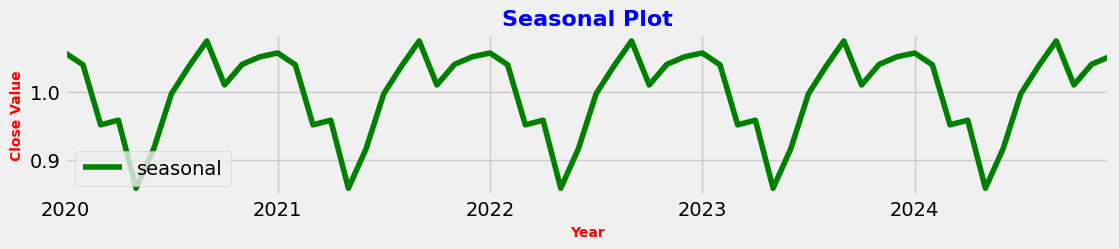

In [25]:
decompo_seasonal = decomposition.seasonal
ts = decompo_seasonal.plot (figsize = (12,2), color = 'green')
ts.set_xlabel ('Year', color = 'red', fontsize = 10, fontstyle = 'normal', fontweight = 'bold', fontname = 'Times New Roman')
ts.set_ylabel ('Close Value', color = 'red', fontsize = 10, fontstyle = 'normal', fontweight = 'bold', fontname = 'timesnewroman')
ts.set_title ('Seasonal Plot', color = 'Blue', fontsize = 16, fontstyle = 'normal', fontweight = 'bold', fontname = 'timesnewroman')
ts.legend (loc = 'best')
plt.show()

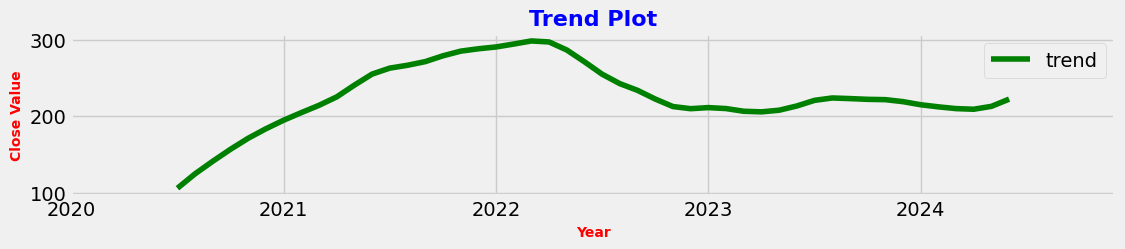

In [26]:
decomp_trend = decomposition.trend
ts = decomposition.trend.plot (figsize = (12,2), color = 'green')
ts.set_xlabel ('Year', color = 'red', fontsize = 10, fontstyle = 'normal', fontweight = 'bold', fontname = 'Times New Roman')
ts.set_ylabel ('Close Value', color = 'red', fontsize = 10, fontstyle = 'normal', fontweight = 'bold', fontname = 'timesnewroman')
ts.set_title ('Trend Plot', color = 'Blue', fontsize = 16, fontstyle = 'normal', fontweight = 'bold', fontname = 'timesnewroman')
ts.legend (loc = 'best')
plt.show()

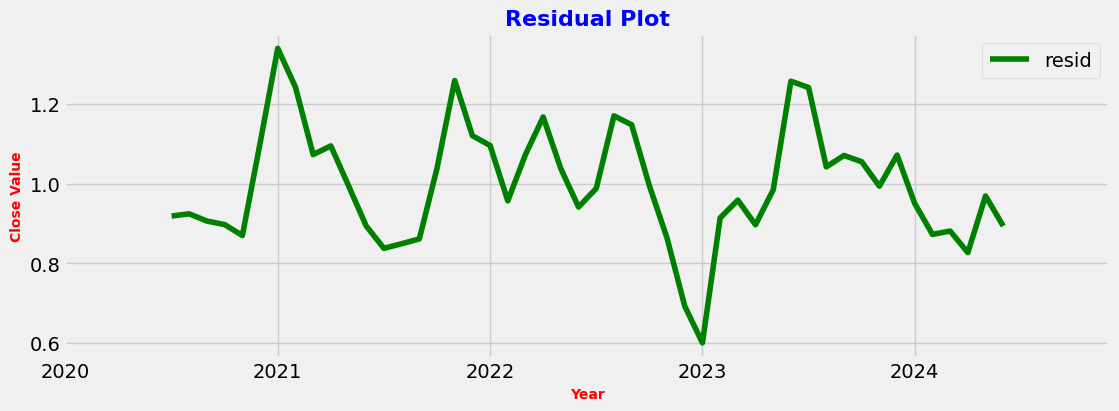

In [27]:
decomp_resid = decomposition.resid
ts = decomp_resid.plot (figsize = (12,4), color = 'green')
ts.set_xlabel ('Year', color = 'red', fontsize = 10, fontstyle = 'normal', fontweight = 'bold', fontname = 'Times New Roman')
ts.set_ylabel ('Close Value', color = 'red', fontsize = 10, fontstyle = 'normal', fontweight = 'bold', fontname = 'timesnewroman')
ts.set_title ('Residual Plot', color = 'Blue', fontsize = 16, fontstyle = 'normal', fontweight = 'bold', fontname = 'timesnewroman')
ts.legend (loc = 'best')
plt.show()

# Train/test split

In [28]:
train_len = int(len(Tsla1) * 0.8)
train = Tsla1[:train_len]
test = Tsla1[train_len:]

In [29]:
print(Tsla1.shape)
print(train.shape)
print(test.shape)

(60, 1)
(48, 1)
(12, 1)


In [30]:
print(len(test))

12


# Naive Method

In [31]:
train

Closing Price
Date                     
2020-01-01         35.243
2020-02-01         53.164
2020-03-01         37.273
2020-04-01         44.240
2020-05-01         53.295
2020-06-01         64.237
2020-07-01         97.343
2020-08-01        120.021
2020-09-01        137.831
2020-10-01        142.403
2020-11-01        155.204
2020-12-01        212.940
2021-01-01        276.259
2021-02-01        264.757
2021-03-01        218.934
2021-04-01        236.539
2021-05-01        205.584
2021-06-01        208.974
2021-07-01        219.712
2021-08-01        235.080
2021-09-01        251.317
2021-10-01        292.783
2021-11-01        373.554
2021-12-01        339.630
2022-01-01        336.723
2022-02-01        292.963
2022-03-01        304.793
2022-04-01        332.462
2022-05-01        255.223
2022-06-01        234.027
2022-07-01        251.394
2022-08-01        294.870
2022-09-01        288.735
2022-10-01        223.810
2022-11-01        191.247
2022-12-01        152.970
2023-01-01        134.196
2023-02-01        199.775
2023-03-01        188.523
2023-04-01        176.955
2023-05-01        175.799
2023-06-01        246.090
2023-07-01        273.506
2023-08-01        242.333
2023-09-01        256.968
2023-10-01        236.908
2023-11-01        229.412
2023-12-01        247.138

In [32]:
def naive_method(data,nforecast):
    forecast = [data[-1]]
    #print ('forecast',forecast)
    number = nforecast - 1
    for i in range (number):
        #print('value of i is',-i)
        #print('forecast value is',forecast[-i])
        forecast.append(forecast[-i])
        #break
    return forecast

In [33]:
y_hat_naive = test.copy ()
y_hat_naive['Naive_Forecast'] = naive_method (train['Closing Price'], nforecast =len(test))
y_hat_naive

<ipython-input-32-b584cceeb7aa>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = [data[-1]]


Closing Price  Naive_Forecast
Date                                     
2024-01-01        216.130         247.138
2024-02-01        192.793         247.138
2024-03-01        176.163         247.138
2024-04-01        165.872         247.138
2024-05-01        177.232         247.138
2024-06-01        182.220         247.138
2024-07-01        240.621         247.138
2024-08-01        209.011         247.138
2024-09-01        235.160         247.138
2024-10-01        238.780         247.138
2024-11-01        318.220         247.138
2024-12-01        384.311         247.138

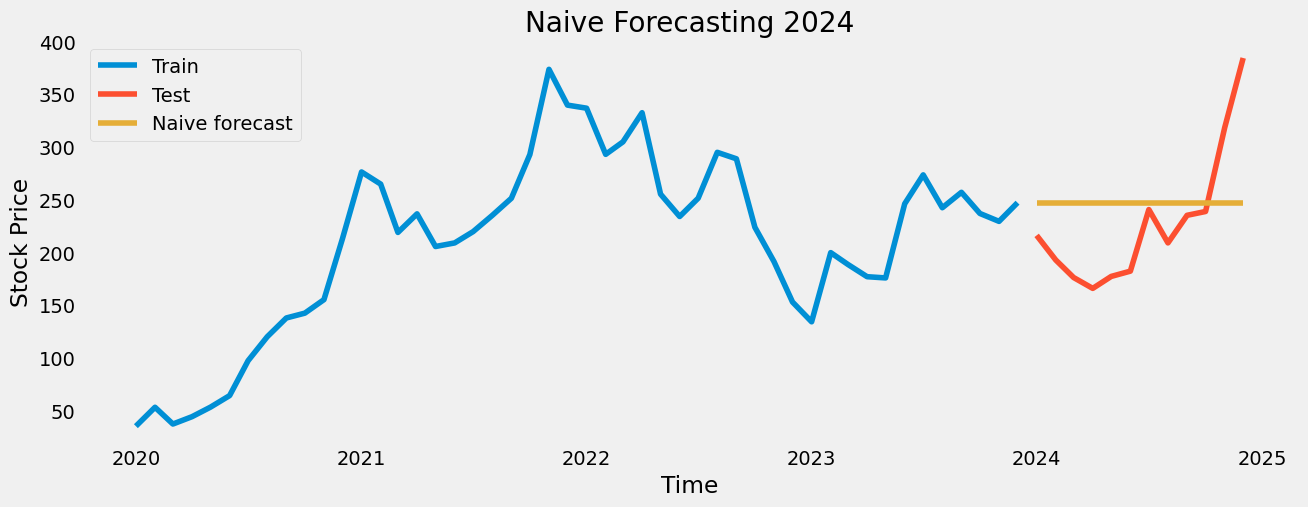

In [34]:
plt.figure(figsize=(14,5))
plt.grid()
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.plot(y_hat_naive['Naive_Forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Forecasting 2024')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [35]:
y_hat_naive['Naive_Forecast'] = naive_method (train['Closing Price'], nforecast = 12)

<ipython-input-32-b584cceeb7aa>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = [data[-1]]


In [36]:
y_hat_naive

Closing Price  Naive_Forecast
Date                                     
2024-01-01        216.130         247.138
2024-02-01        192.793         247.138
2024-03-01        176.163         247.138
2024-04-01        165.872         247.138
2024-05-01        177.232         247.138
2024-06-01        182.220         247.138
2024-07-01        240.621         247.138
2024-08-01        209.011         247.138
2024-09-01        235.160         247.138
2024-10-01        238.780         247.138
2024-11-01        318.220         247.138
2024-12-01        384.311         247.138

In [37]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_naive['Naive_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_naive['Naive_Forecast'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_naive['Naive_Forecast'])),2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

Method  RMSE   MAE   MAPE
0  Naive method  64.7  53.8  24.54

## Future Forecast 2025

In [38]:
# Forecast for the next 12 months
start_forecast_date = "2025-01-01"
future_periods = 12
future_dates = pd.date_range(start=start_forecast_date, periods=future_periods, freq="MS")


# Generate future forecast
future_forecast = naive_method(Tsla1['Closing Price'], nforecast=future_periods)
future_forecast_naive = pd.DataFrame({'Date': future_dates, 'Naive_Forecast': future_forecast})
future_forecast_naive.set_index('Date', inplace=True)

print("\n12-Month Forecast:")
print(future_forecast_naive)


12-Month Forecast:
            Naive_Forecast
Date                      
2025-01-01         384.311
2025-02-01         384.311
2025-03-01         384.311
2025-04-01         384.311
2025-05-01         384.311
2025-06-01         384.311
2025-07-01         384.311
2025-08-01         384.311
2025-09-01         384.311
2025-10-01         384.311
2025-11-01         384.311
2025-12-01         384.311


<ipython-input-32-b584cceeb7aa>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = [data[-1]]


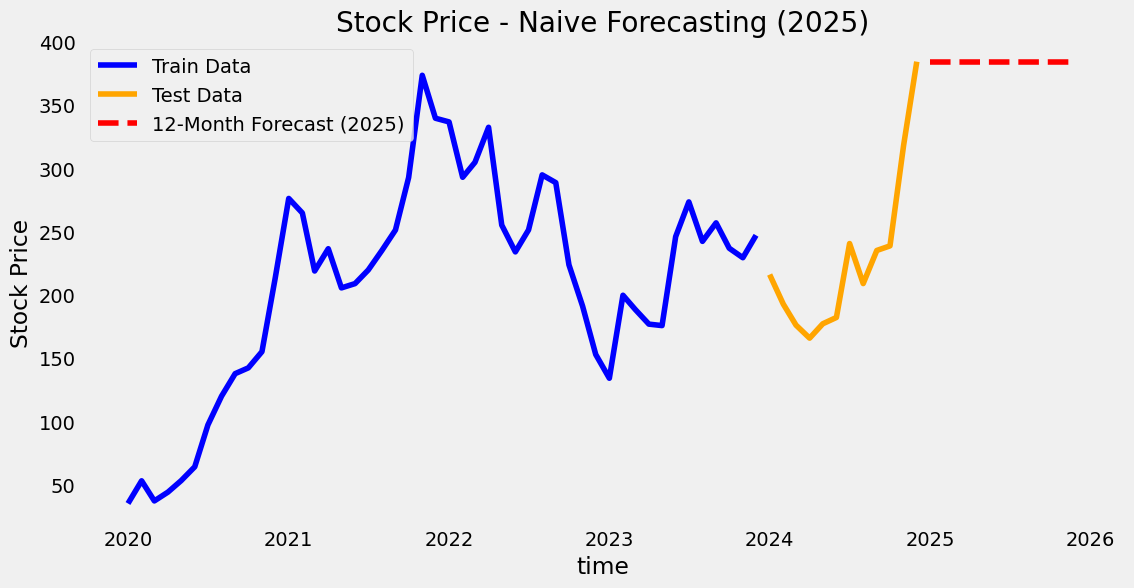

In [39]:
#visualize forecast 2025
plt.figure(figsize=(12, 6))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_naive['Naive_Forecast'], label="12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Stock Price - Naive Forecasting (2025)")
plt.xlabel("time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

In [40]:
print(future_dates)

DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')


# Average Historical Method

In [41]:
def average_historical_method(data, nforecast):
    average = sum(data) / len(data)  # Calculate the average of historical data
    forecast = [average] * nforecast # Create a list of forecasts with the same average value   
    return forecast

In [42]:
y_hat_average_hist = test.copy()
y_hat_average_hist['average_hist_forecast'] = average_historical_method(train['Closing Price'], nforecast = len(test))
y_hat_average_hist

Closing Price  average_hist_forecast
Date                                            
2024-01-01        216.130             209.232021
2024-02-01        192.793             209.232021
2024-03-01        176.163             209.232021
2024-04-01        165.872             209.232021
2024-05-01        177.232             209.232021
2024-06-01        182.220             209.232021
2024-07-01        240.621             209.232021
2024-08-01        209.011             209.232021
2024-09-01        235.160             209.232021
2024-10-01        238.780             209.232021
2024-11-01        318.220             209.232021
2024-12-01        384.311             209.232021

In [43]:
y_hat_average_hist

Closing Price  average_hist_forecast
Date                                            
2024-01-01        216.130             209.232021
2024-02-01        192.793             209.232021
2024-03-01        176.163             209.232021
2024-04-01        165.872             209.232021
2024-05-01        177.232             209.232021
2024-06-01        182.220             209.232021
2024-07-01        240.621             209.232021
2024-08-01        209.011             209.232021
2024-09-01        235.160             209.232021
2024-10-01        238.780             209.232021
2024-11-01        318.220             209.232021
2024-12-01        384.311             209.232021

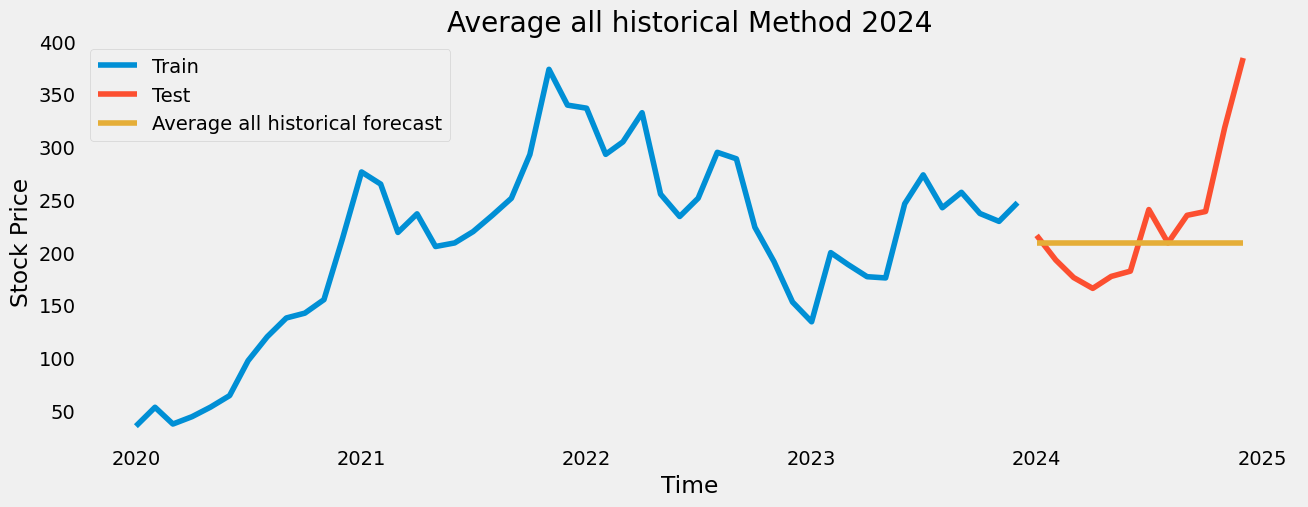

In [44]:
plt.figure(figsize=(14,5))
plt.grid()
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.plot(y_hat_average_hist['average_hist_forecast'], label='Average all historical forecast')
plt.legend(loc='best')
plt.title('Average all historical Method 2024')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_average_hist['average_hist_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_average_hist['average_hist_forecast'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_average_hist['average_hist_forecast'])),2)

results = pd.DataFrame({'Method':['Average all historical Method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

Method   RMSE    MAE   MAPE
0  Average all historical Method  64.62  44.16  17.16

## Future Forecast 2025

In [46]:
# Forecast for the next 12 months
start_forecast_date = "2025-01-01"
future_periods = 12
future_dates = pd.date_range(start=start_forecast_date, periods=future_periods, freq="MS")

# Generate future forecast
future_forecast = average_historical_method(Tsla1['Closing Price'], nforecast=future_periods)
future_forecast_AH = pd.DataFrame({'Date': future_dates, 'Average all historical Method': future_forecast})
future_forecast_AH.set_index('Date', inplace=True)

print("\n12-Month Forecast:")
print(future_forecast_AH)


12-Month Forecast:
            Average all historical Method
Date                                     
2025-01-01                     212.994167
2025-02-01                     212.994167
2025-03-01                     212.994167
2025-04-01                     212.994167
2025-05-01                     212.994167
2025-06-01                     212.994167
2025-07-01                     212.994167
2025-08-01                     212.994167
2025-09-01                     212.994167
2025-10-01                     212.994167
2025-11-01                     212.994167
2025-12-01                     212.994167


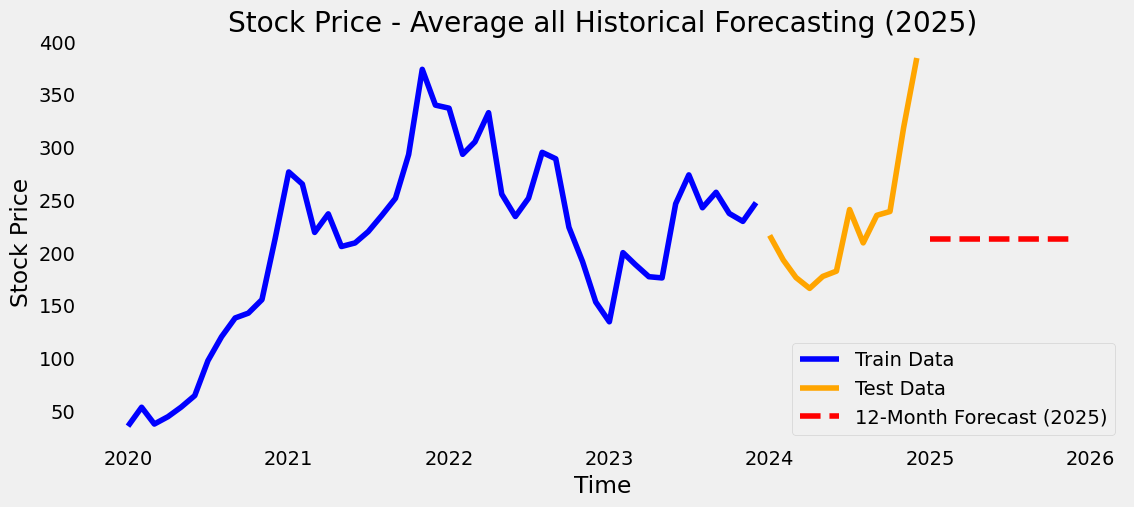

In [47]:
#visualize forecast 2025
plt.figure(figsize=(12, 5))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_AH['Average all historical Method'], label="12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Stock Price - Average all Historical Forecasting (2025)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# Simple Moving Average

In [48]:
y_hat_MA = test.copy()

# MA method
ma_window = 12 # the size of the moving window
y_hat_MA['moving_avg_forecast'] = train['Closing Price'].rolling(ma_window).mean().iloc[-1]

In [49]:
y_hat_MA

Closing Price  moving_avg_forecast
Date                                          
2024-01-01        216.130            217.30025
2024-02-01        192.793            217.30025
2024-03-01        176.163            217.30025
2024-04-01        165.872            217.30025
2024-05-01        177.232            217.30025
2024-06-01        182.220            217.30025
2024-07-01        240.621            217.30025
2024-08-01        209.011            217.30025
2024-09-01        235.160            217.30025
2024-10-01        238.780            217.30025
2024-11-01        318.220            217.30025
2024-12-01        384.311            217.30025

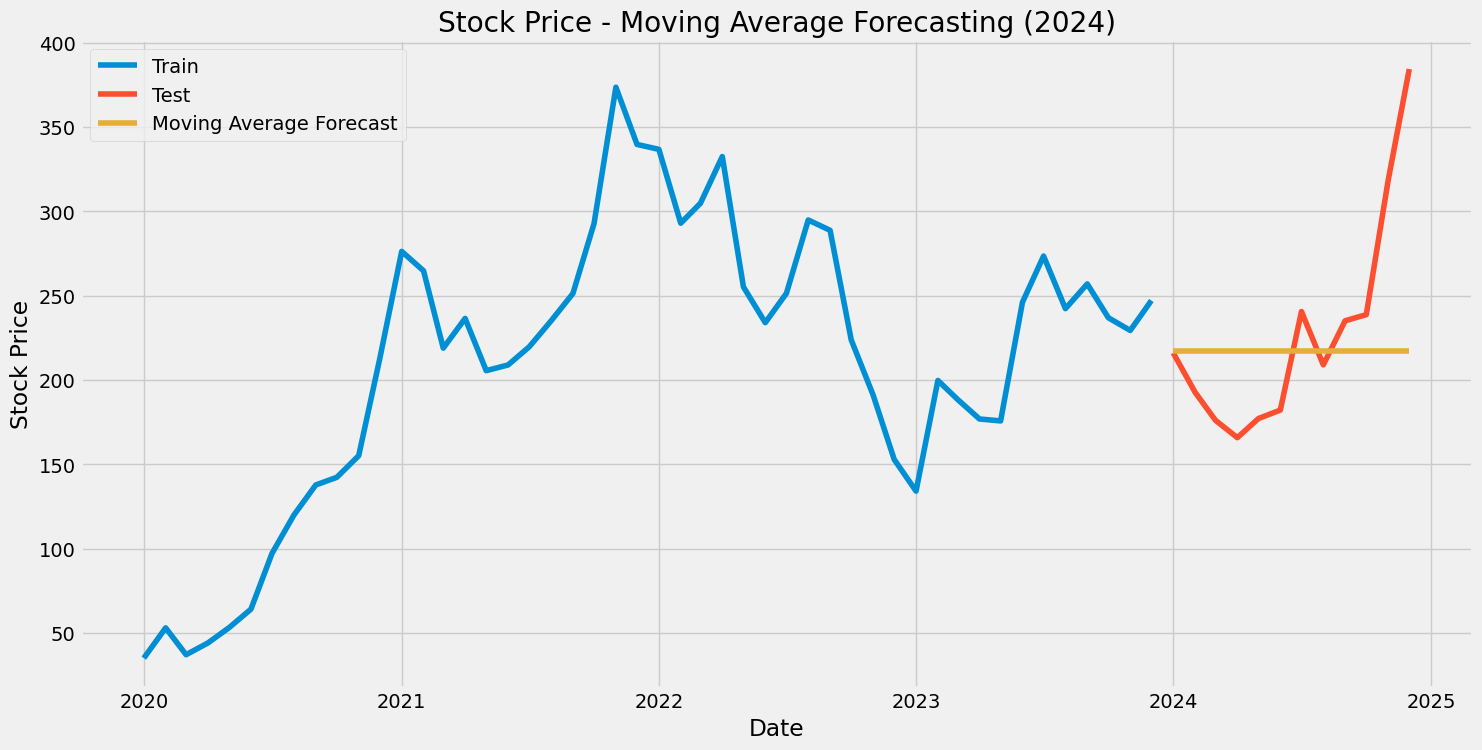

In [50]:
plt.figure(figsize=(16,8))
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.plot(y_hat_MA['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Stock Price - Moving Average Forecasting (2024)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_MA['moving_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_MA['moving_avg_forecast'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_MA['moving_avg_forecast'])),2)

results = pd.DataFrame({'Method':['Moving Averages Method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

Method   RMSE    MAE   MAPE
0  Moving Averages Method  62.75  44.36  17.91

In [52]:
#ask and delete
moving_avg_2025 = Tsla1['Closing Price'].iloc[-1]
moving_avg_2025

384.311

## Future Forecast 2025

In [53]:
#forecast price of 2025
start_forecast_date = "2025-01-01"
future_periods = 12
future_dates = pd.date_range(start=Tsla1.index[-1], periods=future_periods, freq="MS")

# Generate future forecast

future_forecast_MA = pd.DataFrame({'Date': future_dates, 'Moving Averages Method': [moving_avg_2025]*12})
future_forecast_MA.set_index('Date', inplace=True)

print("\n12-Month Forecast:")
print(future_forecast_MA)


12-Month Forecast:
            Moving Averages Method
Date                              
2024-12-01                 384.311
2025-01-01                 384.311
2025-02-01                 384.311
2025-03-01                 384.311
2025-04-01                 384.311
2025-05-01                 384.311
2025-06-01                 384.311
2025-07-01                 384.311
2025-08-01                 384.311
2025-09-01                 384.311
2025-10-01                 384.311
2025-11-01                 384.311


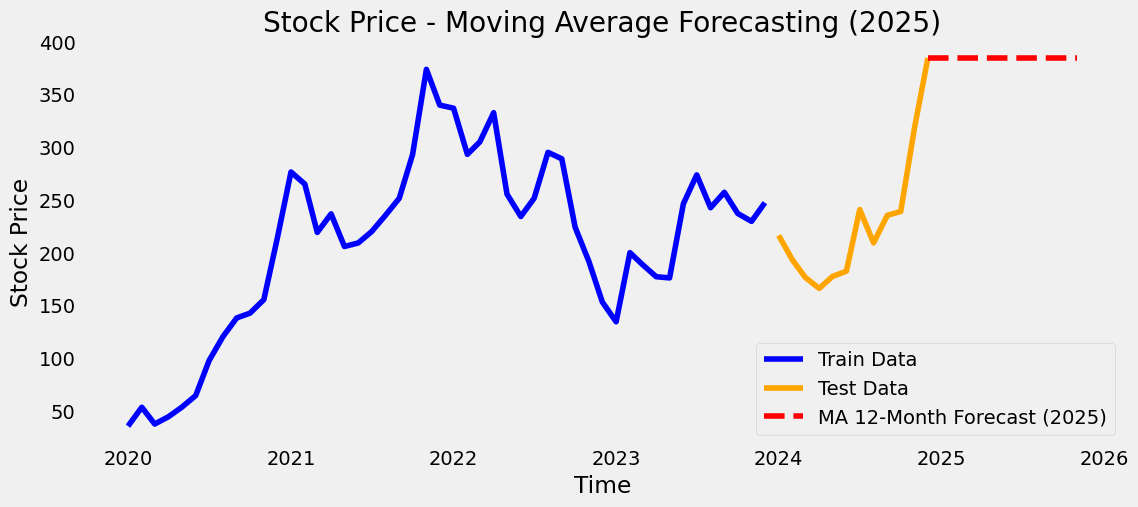

In [54]:
#visualize forecast 2025
plt.figure(figsize=(12, 5))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_MA['Moving Averages Method'], label="MA 12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Stock Price - Moving Average Forecasting (2025)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# Exponential Smoothing 

## Single Exponential Smoothing

In [55]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

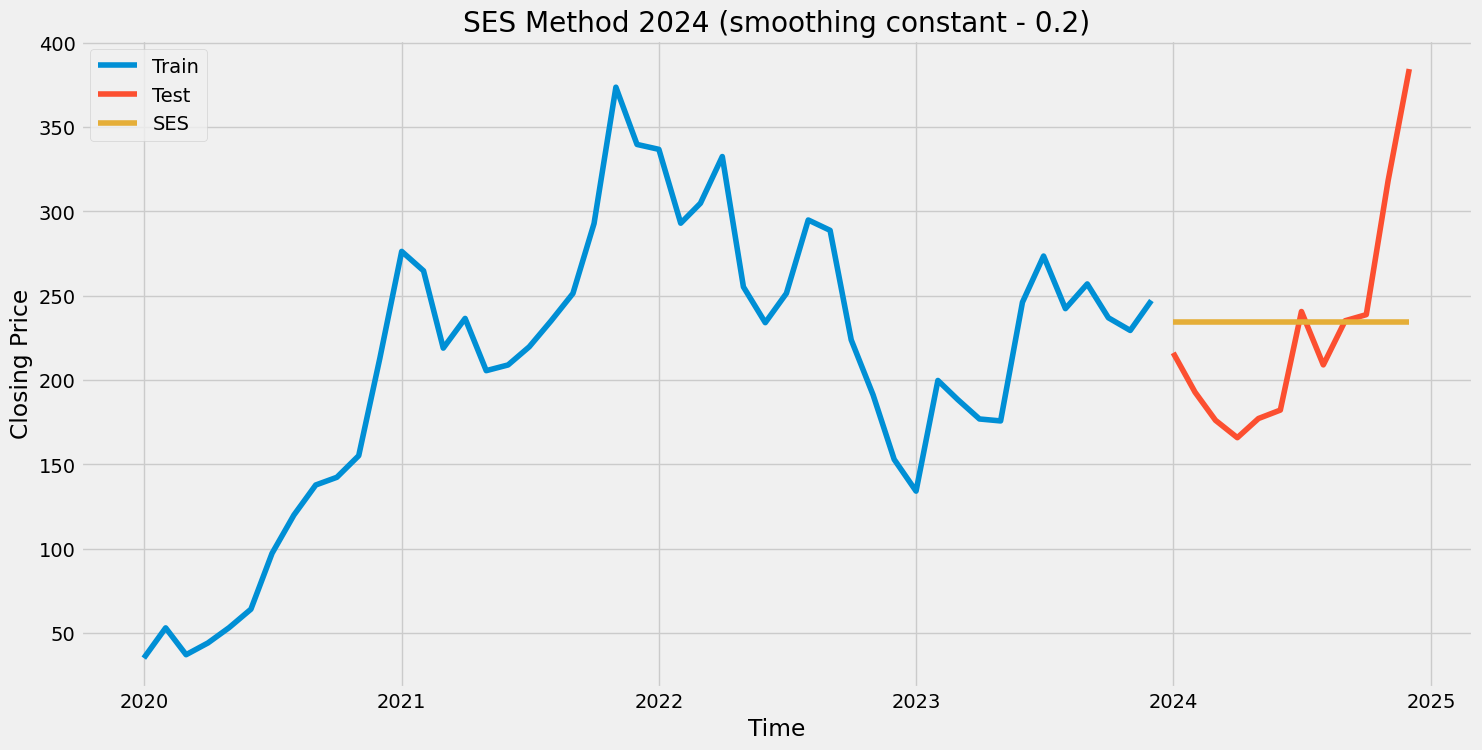

In [56]:
#displaying result for smoothing constant = 0.2
alpha = 0.2

y_hat_ses = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Closing Price'])).fit(smoothing_level=alpha, optimized=False)
y_hat_ses['SES'] = fit2.forecast(len(test)) 

plt.figure(figsize=(16,8))
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('SES Method 2024 (smoothing constant - 0.2)')
plt.plot(y_hat_ses['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [57]:
#test result of smoothing constant = 0.2
y_hat_ses

Closing Price         SES
Date                                 
2024-01-01        216.130  234.461616
2024-02-01        192.793  234.461616
2024-03-01        176.163  234.461616
2024-04-01        165.872  234.461616
2024-05-01        177.232  234.461616
2024-06-01        182.220  234.461616
2024-07-01        240.621  234.461616
2024-08-01        209.011  234.461616
2024-09-01        235.160  234.461616
2024-10-01        238.780  234.461616
2024-11-01        318.220  234.461616
2024-12-01        384.311  234.461616

In [58]:
#accuracy metric of smoothing constant = 0.2
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_ses['SES'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']- y_hat_ses['SES'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']- y_hat_ses['SES'])),2)

results = pd.DataFrame({'Method':['Simple Exponential Method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

Method   RMSE    MAE   MAPE
0  Simple Exponential Method  62.15  47.22  20.64

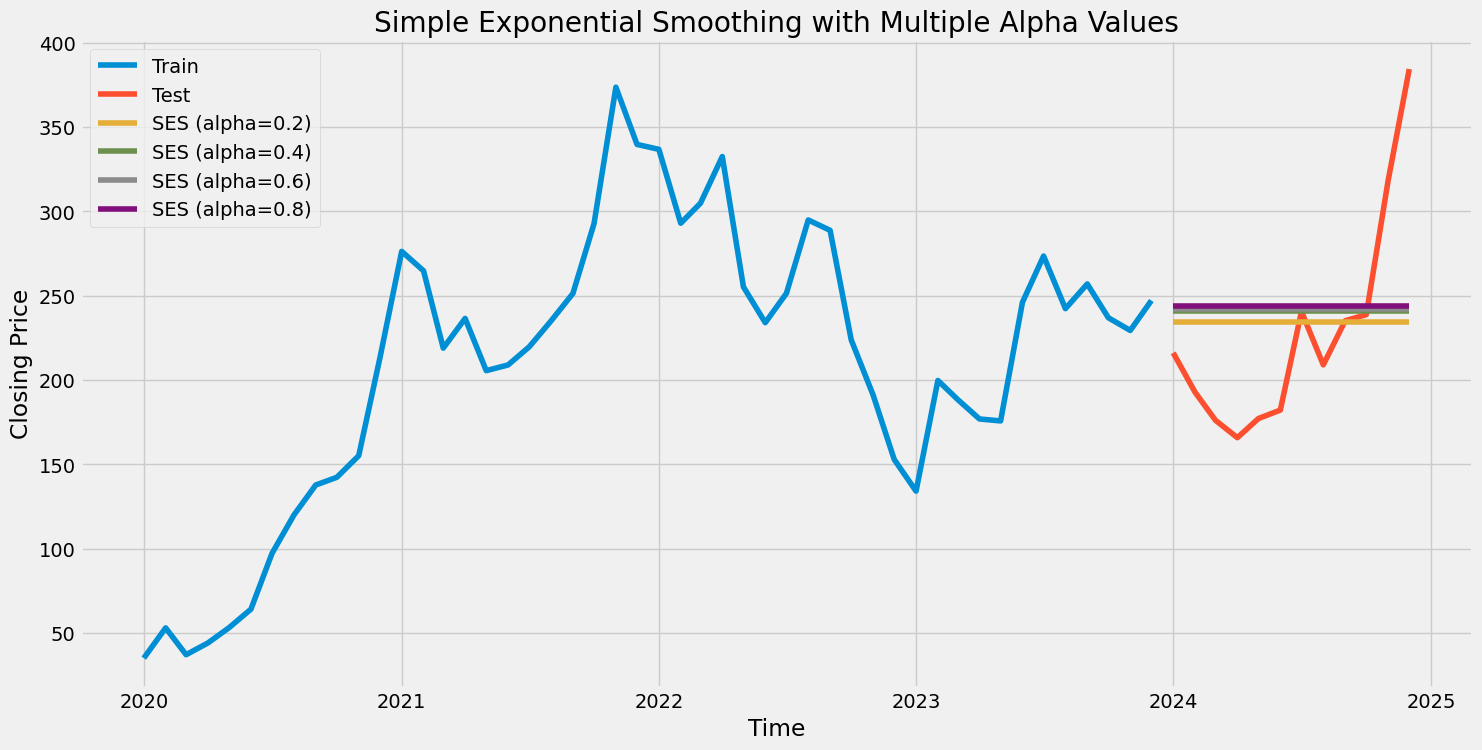

            Method   RMSE    MAE   MAPE
0  SES (alpha=0.2)  62.15  47.22  20.64
1  SES (alpha=0.4)  63.15  49.66  22.25
2  SES (alpha=0.6)  63.43  50.55  22.73
3  SES (alpha=0.8)  63.86  51.74  23.39


In [59]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alphas = [0.2, 0.4, 0.6, 0.8]  # List of alpha values to evaluate
results = []
y_hat_ses = test.copy()
for alpha in alphas:
    # Fit the model with the specified alpha
    fit = SimpleExpSmoothing(np.asarray(train['Closing Price'])).fit(smoothing_level=alpha, optimized=False)
    
    # Forecast for the test period
    y_hat_ses[f'SES_alpha_{alpha}'] = fit.forecast(len(test))
    
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(test['Closing Price'],  y_hat_ses[f'SES_alpha_{alpha}'])).round(2)
    mape = np.round(np.mean(np.abs(test['Closing Price'] -  y_hat_ses[f'SES_alpha_{alpha}']) / test['Closing Price']) * 100, 2)
    mae = np.round(np.mean(np.abs(test['Closing Price'] -  y_hat_ses[f'SES_alpha_{alpha}'])), 2)
 
    results.append({'Method': f'SES (alpha={alpha})', 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})
results_df = pd.DataFrame(results)

# Plot forecasts
plt.figure(figsize=(16, 8))
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')

for alpha in alphas:
    plt.plot(y_hat_ses[f'SES_alpha_{alpha}'], label=f'SES (alpha={alpha})')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing with Multiple Alpha Values')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

# Display the results
print(results_df)


## Future Forecast 2025

In [60]:
#forecast 2025
start_forecast_date = "2025-01-01"
future_periods = 12
future_dates = pd.date_range(start=start_forecast_date, periods=future_periods, freq="MS")

# Generate future forecast
fit2 = SimpleExpSmoothing(np.asarray(Tsla1['Closing Price'])).fit(smoothing_level=0.2, optimized=False)
future_forecast_ses = fit2.forecast(future_periods)

future_forecast_ses = pd.DataFrame({'Date': future_dates, 'Simple Exponential Method': future_forecast_ses})
future_forecast_ses.set_index('Date', inplace=True)

print("\n12-Month Forecast:")
print(future_forecast_ses)


12-Month Forecast:
            Simple Exponential Method
Date                                 
2025-01-01                 266.560311
2025-02-01                 266.560311
2025-03-01                 266.560311
2025-04-01                 266.560311
2025-05-01                 266.560311
2025-06-01                 266.560311
2025-07-01                 266.560311
2025-08-01                 266.560311
2025-09-01                 266.560311
2025-10-01                 266.560311
2025-11-01                 266.560311
2025-12-01                 266.560311


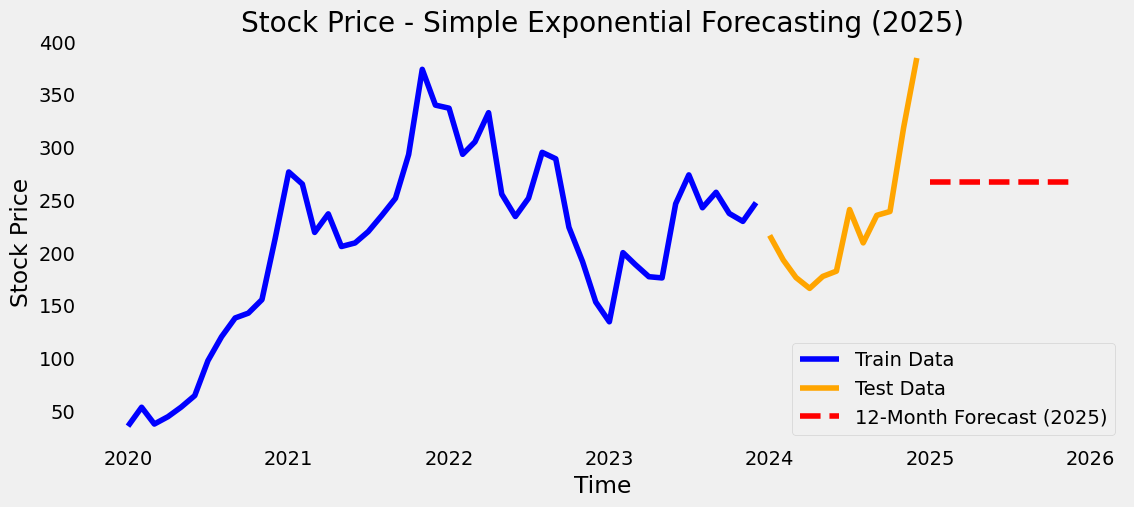

In [61]:
#visualize forecast 2025
plt.figure(figsize=(12, 5))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_ses['Simple Exponential Method'], label="12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Stock Price - Simple Exponential Forecasting (2025)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

##  Holt's Linear

<ipython-input-62-409e03561d91>:6: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitholt = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.9)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


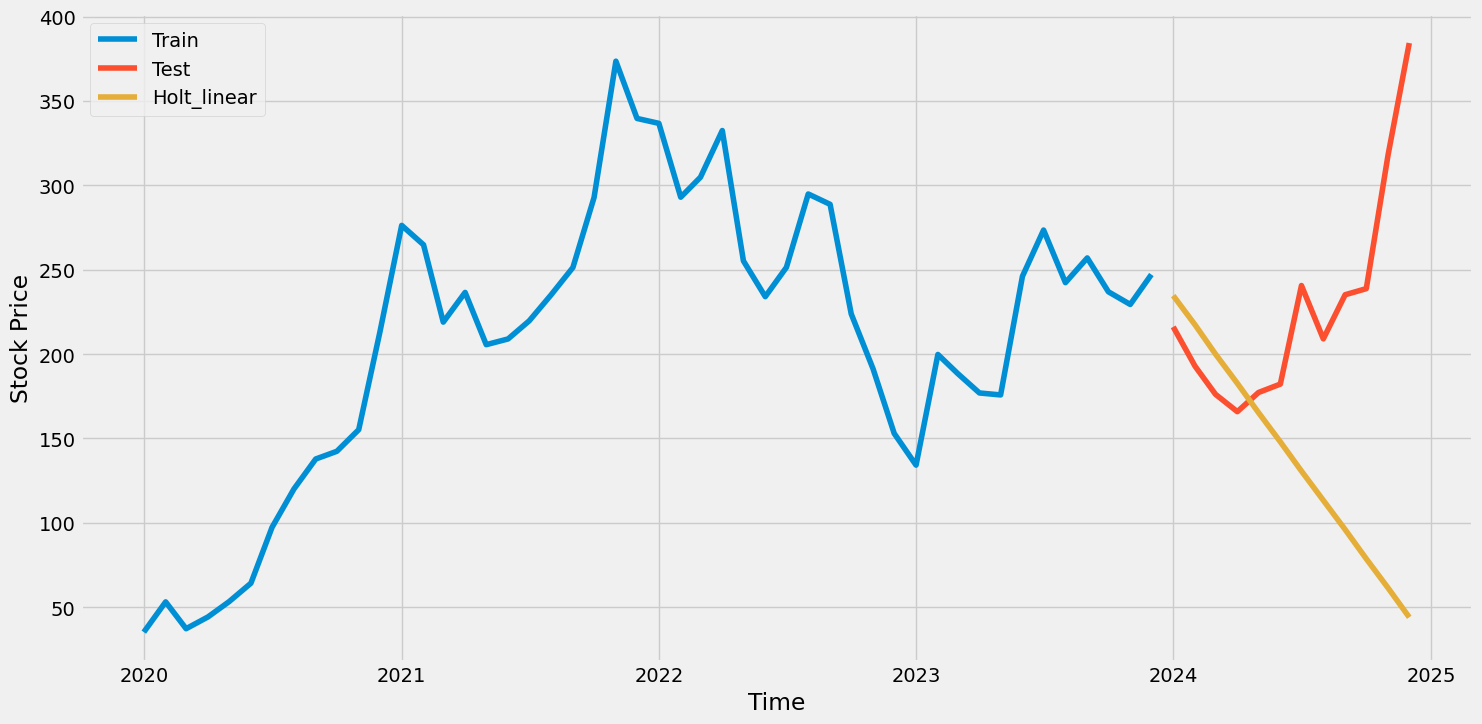

In [62]:
#smoothing_level = 0.1,smoothing_slope = 0.9

from statsmodels.tsa.api import Holt
y_hat_hl1 = test.copy()

fitholt = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.9)
y_hat_hl1['Holt_linear'] = fitholt.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.plot(y_hat_hl1['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [63]:
y_hat_hl1

Closing Price  Holt_linear
Date                                  
2024-01-01        216.130   234.645088
2024-02-01        192.793   217.316454
2024-03-01        176.163   199.987821
2024-04-01        165.872   182.659188
2024-05-01        177.232   165.330555
2024-06-01        182.220   148.001921
2024-07-01        240.621   130.673288
2024-08-01        209.011   113.344655
2024-09-01        235.160    96.016021
2024-10-01        238.780    78.687388
2024-11-01        318.220    61.358755
2024-12-01        384.311    44.030122

In [64]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_hl1['Holt_linear'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_hl1['Holt_linear'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_hl1['Holt_linear'])),2)

results = pd.DataFrame({'Method':['Holt Linear'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

Method    RMSE     MAE   MAPE
0  Holt Linear  144.66  102.65  38.11

In [65]:
#smoothing_level = 0.5,smoothing_slope = 0.5

from statsmodels.tsa.api import Holt
y_hat_hl2 = test.copy()

fitholt = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level = 0.5,smoothing_slope = 0.9)
y_hat_hl2['Holt_linear'] = fitholt.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.plot(y_hat_hl2['Holt_linear'], label='Holt_linear')
plt.title('Holt Linear Forecast 2024 (0.5/0.5)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()

<ipython-input-65-e975b6328978>:6: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitholt = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level = 0.5,smoothing_slope = 0.9)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [66]:
y_hat_hl2

Closing Price  Holt_linear
Date                                  
2024-01-01        216.130   226.291191
2024-02-01        192.793   221.457664
2024-03-01        176.163   216.624137
2024-04-01        165.872   211.790611
2024-05-01        177.232   206.957084
2024-06-01        182.220   202.123557
2024-07-01        240.621   197.290031
2024-08-01        209.011   192.456504
2024-09-01        235.160   187.622977
2024-10-01        238.780   182.789450
2024-11-01        318.220   177.955924
2024-12-01        384.311   173.122397

In [67]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_hl2['Holt_linear'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_hl2['Holt_linear'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_hl2['Holt_linear'])),2)

results = pd.DataFrame({'Method':['Holt Linear'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

Method  RMSE    MAE   MAPE
0  Holt Linear  80.5  57.47  22.21

In [68]:
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
hl_test = test.copy()
alpha_values = [0.1, 0.3, 0.5]  # Smoothing levels to test
beta_values = [0.5, 0.7, 0.9]   # Smoothing slopes to test
results = []

for alpha in alpha_values:
    for beta in beta_values:
        # Fit the Holt model with specified smoothing parameters
        fit = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
        # Forecast for the test period
        hl_test[f'Holt_alpha_{alpha}_beta_{beta}'] = fit.forecast(len(test))
        
        # Calculate performance metrics
        rmse = np.sqrt(mean_squared_error(test['Closing Price'], hl_test[f'Holt_alpha_{alpha}_beta_{beta}'])).round(2)
        mape = np.round(np.mean(np.abs(test['Closing Price'] - hl_test[f'Holt_alpha_{alpha}_beta_{beta}']) / test['Closing Price']) * 100, 2)
        mae = np.round(np.mean(np.abs(test['Closing Price'] - hl_test[f'Holt_alpha_{alpha}_beta_{beta}'])), 2)
        # Append results
        results.append({'Method': f'Holt (alpha={alpha}, beta={beta})', 'RMSE': rmse, 'MAE': mae, 'MAPE': mape})

# Create a DataFrame to display results
results_df1 = pd.DataFrame(results)

plt.figure(figsize=(16, 8))
plt.plot(train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')

for alpha in alpha_values:
    for beta in beta_values:
        plt.plot(hl_test[f'Holt_alpha_{alpha}_beta_{beta}'], label=f'Holt (alpha={alpha}, beta={beta})')
plt.legend(loc='best')
plt.title('Holt Linear Trend Forecast with Multiple Alpha and Beta Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
# Display the results
print(results_df1)


<ipython-input-68-59f109ac74d7>:14: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
<ipython-input-68-59f109ac74d7>:14: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
<ipython-input-68-59f109ac74d7>:14: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
<ipython-input-68-59f109ac74d7>:14: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = Holt(np.asarray(train['Closing Price'])).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
<ipython-input-68-59f109ac74d7>:

                       Method    RMSE     MAE    MAPE
0  Holt (alpha=0.1, beta=0.5)   98.41   89.01   42.69
1  Holt (alpha=0.1, beta=0.7)  193.36  184.94   85.22
2  Holt (alpha=0.1, beta=0.9)  236.25  228.47  105.07
3  Holt (alpha=0.3, beta=0.5)   76.84   72.24   35.05
4  Holt (alpha=0.3, beta=0.7)   89.48   68.86   27.72
5  Holt (alpha=0.3, beta=0.9)  144.66  102.65   38.11
6  Holt (alpha=0.5, beta=0.5)   75.29   56.18   22.83
7  Holt (alpha=0.5, beta=0.7)   91.34   64.73   24.54
8  Holt (alpha=0.5, beta=0.9)   80.50   57.47   22.21


## Future Forecast 2025, 0.5/0.5

In [69]:
#future forecast 2025, smoothing_level=0.5, smoothing_slope=0.5
start_forecast_date = "2025-01-01"
future_periods = 12
future_dates = pd.date_range(start=start_forecast_date, periods=future_periods, freq="MS")
fit_holt = Holt(np.asarray(Tsla1['Closing Price'])).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)

future_forecast_holt = fit_holt.forecast(future_periods)
future_forecast_holt = pd.DataFrame({'Date': future_dates, 'Holt Linear Method': future_forecast_holt})
future_forecast_holt.set_index('Date', inplace=True)

print("\n12-Month Forecast:")
print(future_forecast_holt)


12-Month Forecast:
            Holt Linear Method
Date                          
2025-01-01          396.478479
2025-02-01          442.506935
2025-03-01          488.535391
2025-04-01          534.563847
2025-05-01          580.592302
2025-06-01          626.620758
2025-07-01          672.649214
2025-08-01          718.677670
2025-09-01          764.706126
2025-10-01          810.734582
2025-11-01          856.763037
2025-12-01          902.791493


<ipython-input-69-15104d39eefe>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit_holt = Holt(np.asarray(Tsla1['Closing Price'])).fit(smoothing_level=0.5, smoothing_slope=0.5, optimized=False)


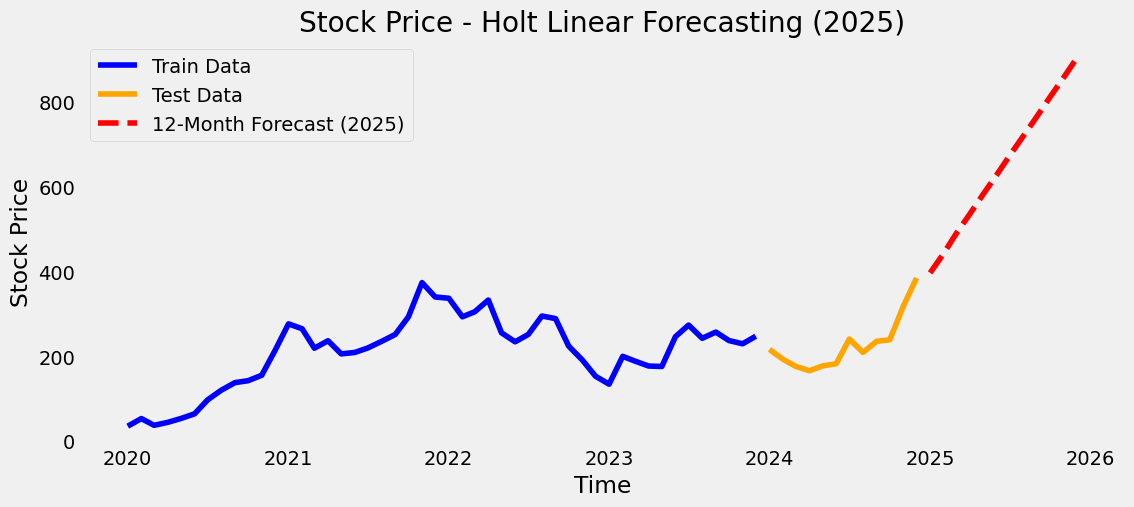

In [70]:
#visualize forecast 2025
plt.figure(figsize=(12, 5))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_holt['Holt Linear Method'], label="12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Stock Price - Holt Linear Forecasting (2025)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

##  Holt Winter 

## seasonal period = 12, add/add

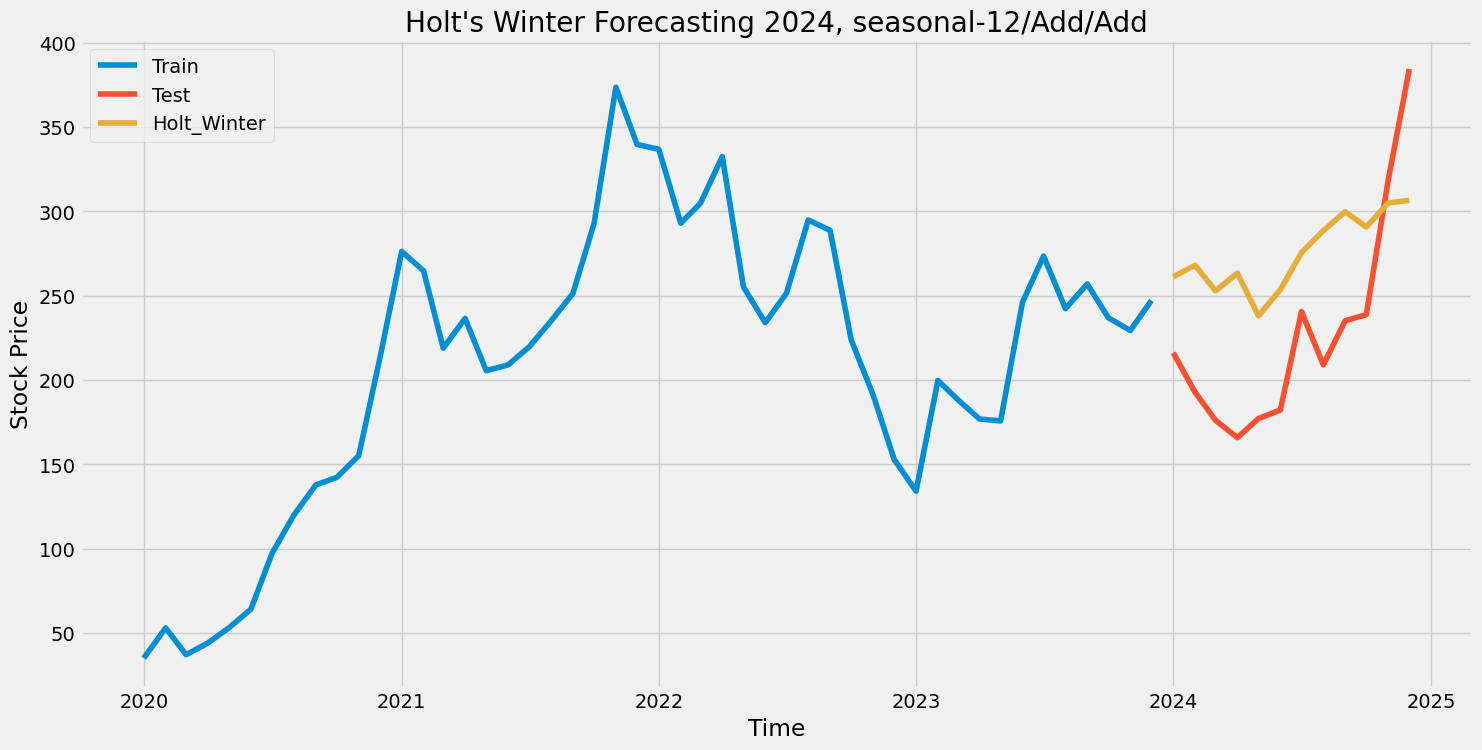

In [71]:
#visualize 2024 forecast
y_hat_holtwinter2 = test.copy()
fit_hw2 = ExponentialSmoothing(np.asarray(train['Closing Price']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()

y_hat_holtwinter2['Holt_Winter'] = fit_hw2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Holt's Winter Forecasting 2024, seasonal-12/Add/Add")
plt.plot(y_hat_holtwinter2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [72]:
y_hat_holtwinter2

Closing Price  Holt_Winter
Date                                  
2024-01-01        216.130   261.214663
2024-02-01        192.793   268.012535
2024-03-01        176.163   252.880089
2024-04-01        165.872   263.347473
2024-05-01        177.232   238.117690
2024-06-01        182.220   253.564310
2024-07-01        240.621   275.507671
2024-08-01        209.011   288.517698
2024-09-01        235.160   299.793275
2024-10-01        238.780   290.719927
2024-11-01        318.220   304.940346
2024-12-01        384.311   306.492453

In [73]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_holtwinter2['Holt_Winter'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_holtwinter2['Holt_Winter'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_holtwinter2['Holt_Winter'])),2)

hw_12_add_add = pd.DataFrame({'Method':['Holt Winter 12/add/add'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
hw_12_add_add = hw_12_add_add[['Method', 'RMSE', 'MAE', 'MAPE']]
hw_12_add_add

Method   RMSE   MAE   MAPE
0  Holt Winter 12/add/add  66.16  62.4  30.16

## seasonal period = 12,mul/add

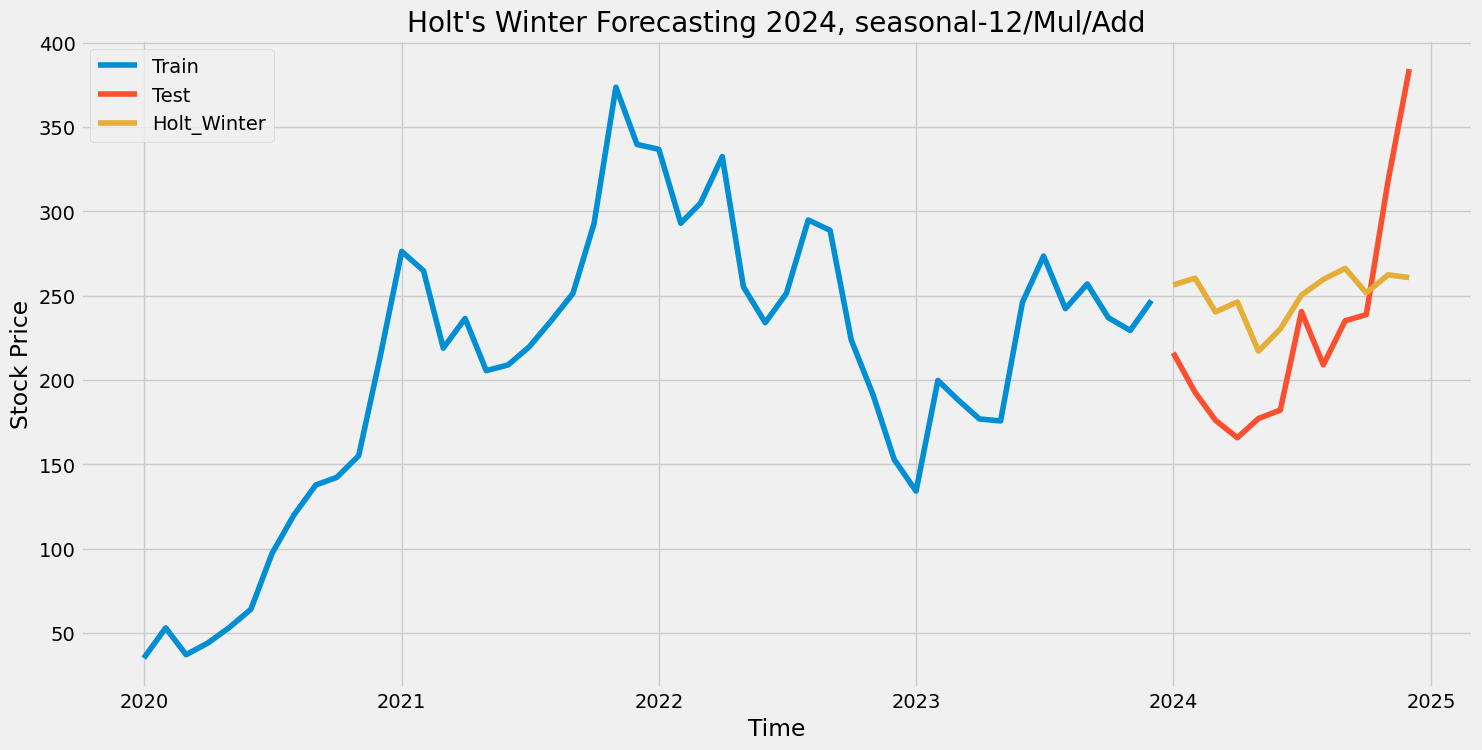

In [74]:
#visualize 2024 forecast
y_hat_holtwinter = test.copy()
fit_hw = ExponentialSmoothing(np.asarray(train['Closing Price']) ,seasonal_periods=12 ,trend='mul', seasonal='add',).fit()

y_hat_holtwinter['Holt_Winter'] = fit_hw.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Holt's Winter Forecasting 2024, seasonal-12/Mul/Add")
plt.plot(y_hat_holtwinter['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [75]:
#2024 forecast and actual prices
y_hat_holtwinter

Closing Price  Holt_Winter
Date                                  
2024-01-01        216.130   256.399280
2024-02-01        192.793   260.358455
2024-03-01        176.163   240.392161
2024-04-01        165.872   246.295226
2024-05-01        177.232   217.152444
2024-06-01        182.220   230.309067
2024-07-01        240.621   250.385372
2024-08-01        209.011   259.644438
2024-09-01        235.160   266.193945
2024-10-01        238.780   251.743136
2024-11-01        318.220   262.368894
2024-12-01        384.311   260.747102

In [76]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_holtwinter['Holt_Winter'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_holtwinter['Holt_Winter'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_holtwinter['Holt_Winter'])),2)

hw_12_mul_add = pd.DataFrame({'Method':['Holt Winter 12/mul/add'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
hw_12_mul_add = hw_12_mul_add[['Method', 'RMSE', 'MAE', 'MAPE']]
hw_12_mul_add

Method   RMSE    MAE   MAPE
0  Holt Winter 12/mul/add  59.77  52.03  23.68

## seasonal period = 16/mul/add

In [77]:
y_hat_holtwinter1 = test.copy()
fit_hw1 = ExponentialSmoothing(np.asarray(train['Closing Price']) ,seasonal_periods=16 ,trend='mul', seasonal='add',).fit()

y_hat_holtwinter1['Holt_Winter'] = fit_hw1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Closing Price'], label='Train')
plt.plot(test['Closing Price'], label='Test')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Holt's Winter Forecasting 2024, seasonal-16/Mul/Add")
plt.plot(y_hat_holtwinter1['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [78]:
y_hat_holtwinter1

Closing Price  Holt_Winter
Date                                  
2024-01-01        216.130   224.091759
2024-02-01        192.793   206.644242
2024-03-01        176.163   191.241068
2024-04-01        165.872   183.128161
2024-05-01        177.232   182.341559
2024-06-01        182.220   218.532127
2024-07-01        240.621   249.607783
2024-08-01        209.011   238.774861
2024-09-01        235.160   240.184801
2024-10-01        238.780   247.413472
2024-11-01        318.220   261.578229
2024-12-01        384.311   276.551795

In [79]:
rmse = np.sqrt(mean_squared_error(test['Closing Price'], y_hat_holtwinter1['Holt_Winter'])).round(2)
mape = np.round(np.mean(np.abs(test['Closing Price']-y_hat_holtwinter1['Holt_Winter'])/test['Closing Price'])*100,2)
mae  = np.round(np.mean(np.abs(test['Closing Price']-y_hat_holtwinter1['Holt_Winter'])),2)

hw_16_mul_add = pd.DataFrame({'Method':['Holt Winter 16/mul/add'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
hw_16_mul_add = hw_16_mul_add[['Method', 'RMSE', 'MAE', 'MAPE']]
hw_16_mul_add

Method   RMSE    MAE   MAPE
0  Holt Winter 16/mul/add  38.74  26.03  10.18

## Comparing the results

In [80]:
print(hw_12_add_add)
print(hw_12_mul_add)

                   Method   RMSE   MAE   MAPE
0  Holt Winter 12/add/add  66.16  62.4  30.16
                   Method   RMSE    MAE   MAPE
0  Holt Winter 12/mul/add  59.77  52.03  23.68


In [81]:
print(hw_12_add_add)
print(hw_12_mul_add)
print(hw_16_mul_add)

                   Method   RMSE   MAE   MAPE
0  Holt Winter 12/add/add  66.16  62.4  30.16
                   Method   RMSE    MAE   MAPE
0  Holt Winter 12/mul/add  59.77  52.03  23.68
                   Method   RMSE    MAE   MAPE
0  Holt Winter 16/mul/add  38.74  26.03  10.18


## Future Forecast 2025, 16/mul/add

In [82]:
#future forecast 2025
fit_holtwinter = ExponentialSmoothing(np.asarray(Tsla1['Closing Price']) ,seasonal_periods=16 ,trend='mul', seasonal='add',).fit()

future_forecast_holtwinter = fit_holtwinter.forecast(future_periods)
future_forecast_holtwinter = pd.DataFrame({'Date': future_dates, 'Holt Winter Method': future_forecast_holtwinter})
future_forecast_holtwinter.set_index('Date', inplace=True)

print("\n12-Month Forecast:")
print(future_forecast_holtwinter)


12-Month Forecast:
            Holt Winter Method
Date                          
2025-01-01          382.734761
2025-02-01          363.887220
2025-03-01          350.305376
2025-04-01          375.090704
2025-05-01          351.105795
2025-06-01          333.975645
2025-07-01          320.778922
2025-08-01          314.031160
2025-09-01          317.990197
2025-10-01          349.046419
2025-11-01          389.497745
2025-12-01          375.491662


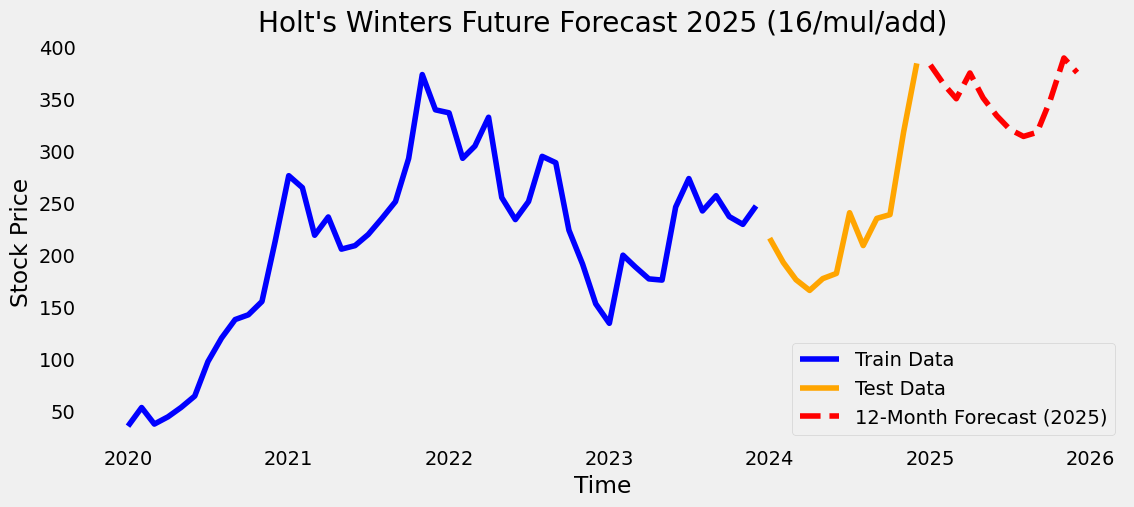

In [83]:
#visualize future forecast 2025
plt.figure(figsize=(12, 5))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_holtwinter['Holt Winter Method'], label="12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Holt's Winters Future Forecast 2025 (16/mul/add)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# ARIMA

## ADF & Differencing

In [84]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(Tsla1['Closing Price'].dropna())
print('ADF Statistic %f' %adf_test[0])
print('p_value:%f'%adf_test[1])

ADF Statistic -1.968133
p_value:0.300718


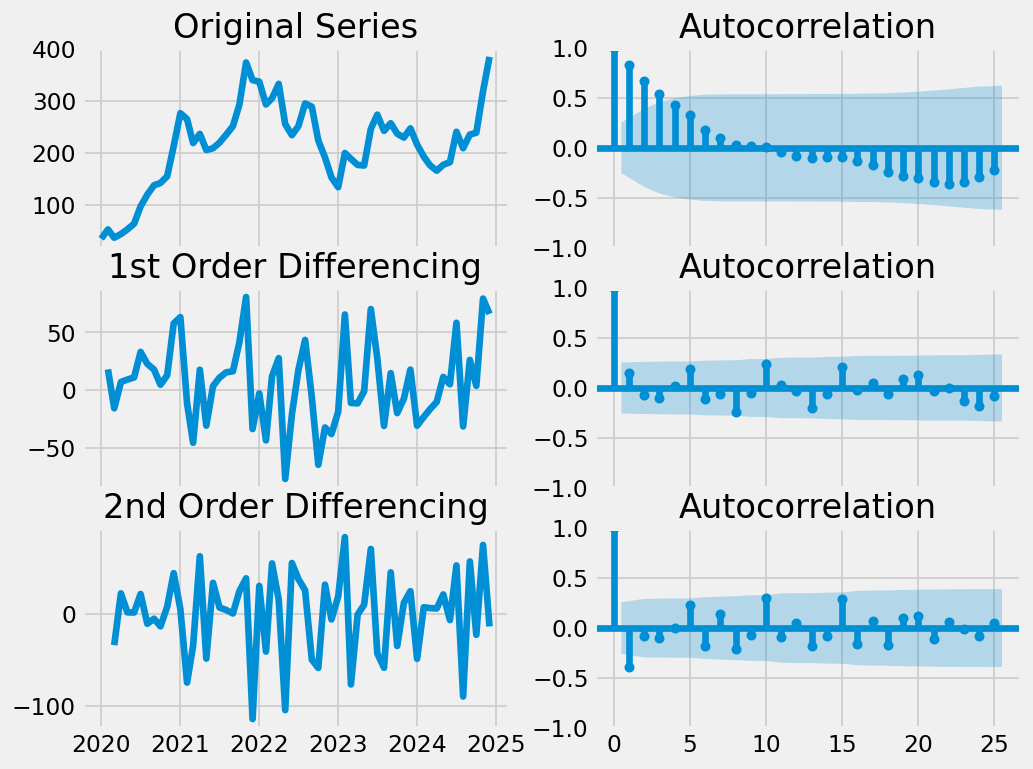

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex='col')
axes[0, 0].plot(Tsla1['Closing Price']); axes[0, 0].set_title('Original Series')
plot_acf(Tsla1['Closing Price'], lags = 25, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(Tsla1['Closing Price'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Tsla1['Closing Price'].diff().dropna(), lags = 25, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(Tsla1['Closing Price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(Tsla1['Closing Price'].diff().diff().dropna(), lags = 25, ax=axes[2, 1])

plt.show()

In [86]:
#checking if the time series is stationary
first_diff = Tsla1['Closing Price'].diff().dropna()
adf_first = adfuller(first_diff)

print('ADF Statistic %f' %adf_first[0])
print('p-value: %.15f' % adf_first[1])
#first differencing is already stationary

ADF Statistic -6.191461
p-value: 0.000000061083984


In [87]:
Tsla1['Closing Price'].diff().diff().dropna()

Date
2020-03-01    -33.812
2020-04-01     22.858
2020-05-01      2.088
2020-06-01      1.887
2020-07-01     22.164
2020-08-01    -10.428
2020-09-01     -4.868
2020-10-01    -13.238
2020-11-01      8.229
2020-12-01     44.935
2021-01-01      5.583
2021-02-01    -74.821
2021-03-01    -34.321
2021-04-01     63.428
2021-05-01    -48.560
2021-06-01     34.345
2021-07-01      7.348
2021-08-01      4.630
2021-09-01      0.869
2021-10-01     25.229
2021-11-01     39.305
2021-12-01   -114.695
2022-01-01     31.017
2022-02-01    -40.853
2022-03-01     55.590
2022-04-01     15.839
2022-05-01   -104.908
2022-06-01     56.043
2022-07-01     38.563
2022-08-01     26.109
2022-09-01    -49.611
2022-10-01    -58.790
2022-11-01     32.362
2022-12-01     -5.714
2023-01-01     19.503
2023-02-01     84.353
2023-03-01    -76.831
2023-04-01     -0.316
2023-05-01     10.412
2023-06-01     71.447
2023-07-01    -42.875
2023-08-01    -58.589
2023-09-01     45.808
2023-10-01    -34.695
2023-11-01     12.564
2023-

In [88]:
Tsla1['Closing Price']

Date
2020-01-01     35.243
2020-02-01     53.164
2020-03-01     37.273
2020-04-01     44.240
2020-05-01     53.295
2020-06-01     64.237
2020-07-01     97.343
2020-08-01    120.021
2020-09-01    137.831
2020-10-01    142.403
2020-11-01    155.204
2020-12-01    212.940
2021-01-01    276.259
2021-02-01    264.757
2021-03-01    218.934
2021-04-01    236.539
2021-05-01    205.584
2021-06-01    208.974
2021-07-01    219.712
2021-08-01    235.080
2021-09-01    251.317
2021-10-01    292.783
2021-11-01    373.554
2021-12-01    339.630
2022-01-01    336.723
2022-02-01    292.963
2022-03-01    304.793
2022-04-01    332.462
2022-05-01    255.223
2022-06-01    234.027
2022-07-01    251.394
2022-08-01    294.870
2022-09-01    288.735
2022-10-01    223.810
2022-11-01    191.247
2022-12-01    152.970
2023-01-01    134.196
2023-02-01    199.775
2023-03-01    188.523
2023-04-01    176.955
2023-05-01    175.799
2023-06-01    246.090
2023-07-01    273.506
2023-08-01    242.333
2023-09-01    256.968
2023-

## Autocorrelation

In [89]:
#Choosing P value by pacf plot
plot_pacf(Tsla1['Closing Price'].diff().dropna(), lags=25)
plt.show()

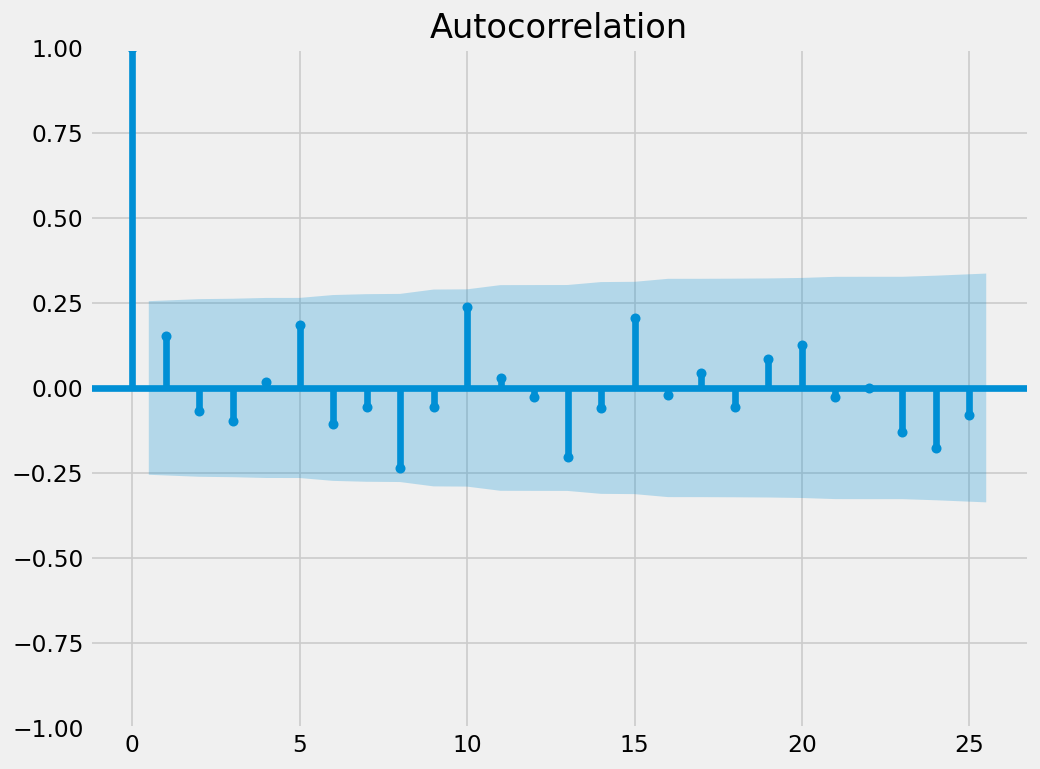

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Tsla1['Closing Price'].diff().dropna(), lags = 25)
plt.show()

## 1,1,1

In [91]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(Tsla1['Closing Price'].dropna(), order=(1,1,1))
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:          Closing Price   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -292.525
Date:                Mon, 27 Jan 2025   AIC                            591.051
Time:                        12:25:29   BIC                            597.283
Sample:                    01-01-2020   HQIC                           593.484
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0538      0.721     -0.075      0.941      -1.466       1.359
ma.L1          0.2424      0.717      0.338      0.735      -1.163       1.648
sigma2      1185.1631    223.116      5.312      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


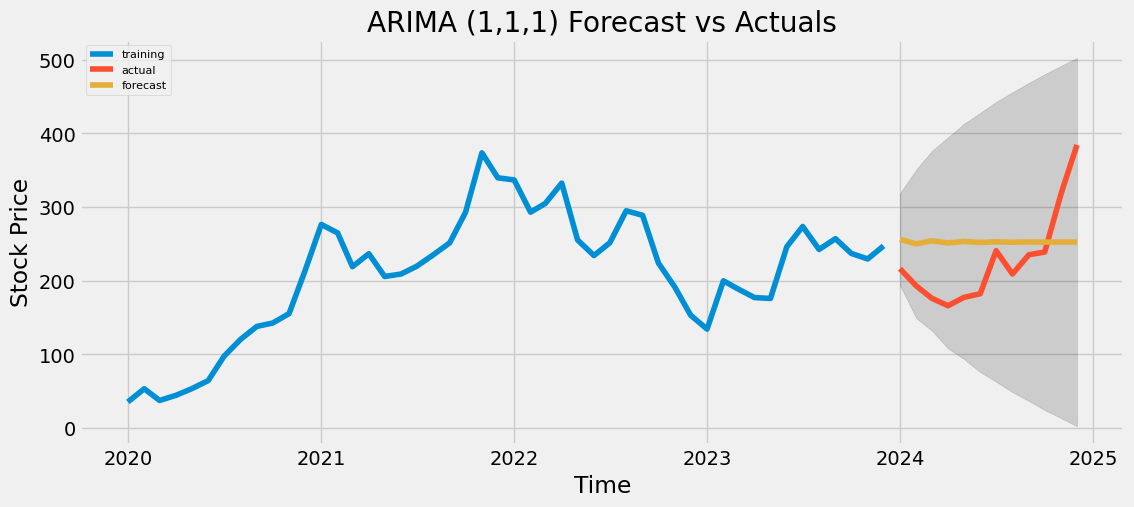

In [92]:
model1 = ARIMA(train, order=(1,1,1))  
fitted = model1.fit()  

# Forecast
fc1 = fitted.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins = fitted.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series1 = pd.Series(fc1, index=test.index)
lower_series1 = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series1 = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series1, label='forecast')

plt.fill_between(lower_series1.index, lower_series1, upper_series1, 
                 color='k', alpha=.15)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('ARIMA (1,1,1) Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [93]:
#1,1,1
import numpy as np
from statsmodels.tsa.stattools import acf  # Import the ACF function
actual = test['Closing Price']

# Forecast accuracy function
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_metrics1 = forecast_accuracy(fc1, actual)
print(accuracy_metrics1)

{'mape': 0.2654952175497963, 'me': 24.530544423196602, 'mae': 57.48238456741482, 'mpe': 0.17383135835814809, 'rmse': 66.49772455766507, 'corr': 0.020167406109335085, 'minmax': 0.2082376316316844, 'acf1': 0.5501199328214935}


111 - 66.49 57.48  0.26
211 - 65.36 55.20  0.25
212 - 64    46.9   0.20
311 - 65.4  55.3   0.25

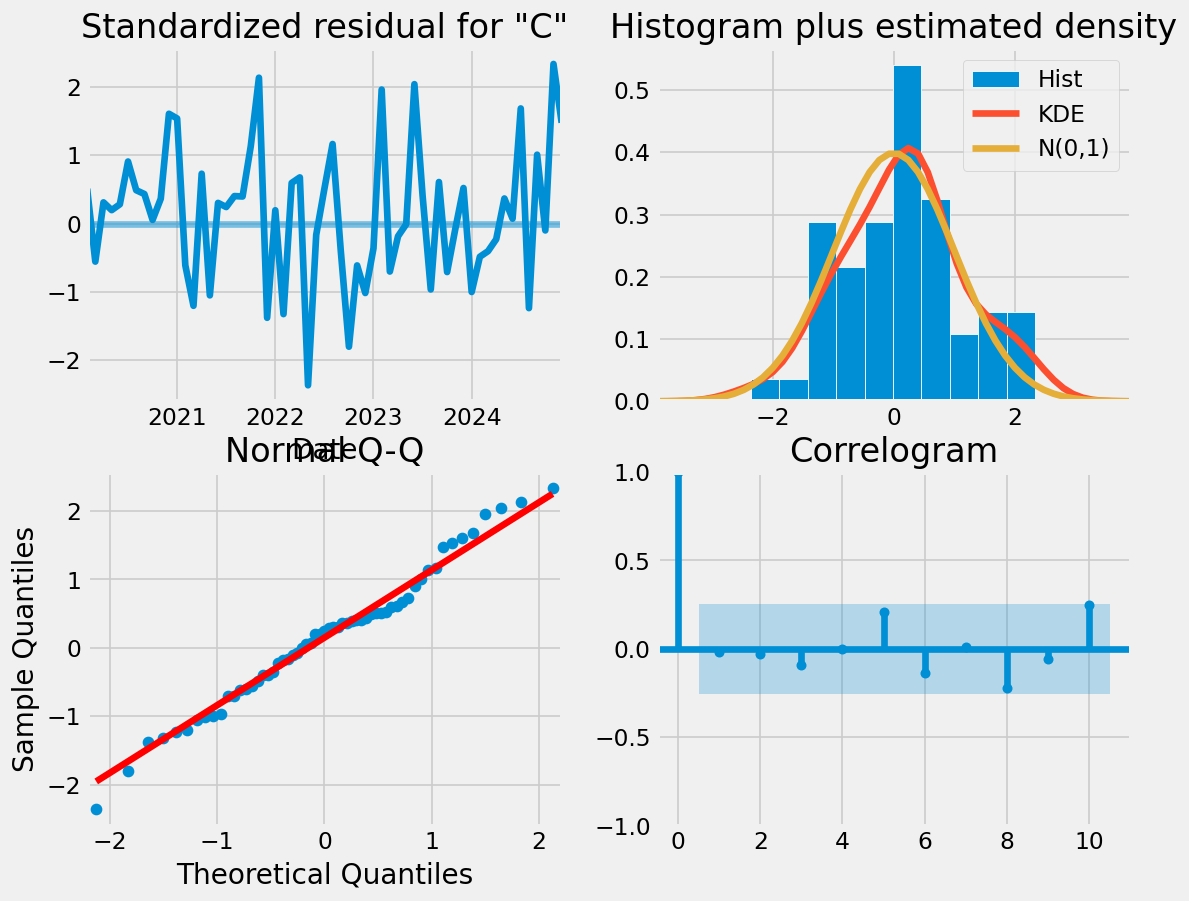

In [94]:
model_fit1.plot_diagnostics(figsize=(10,8))
plt.show()

## 2,1,2

In [95]:
model2 = ARIMA(Tsla1['Closing Price'], order=(2,1,2))
model_fit2 = model2.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:          Closing Price   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -290.031
Date:                Mon, 27 Jan 2025   AIC                            590.062
Time:                        12:25:31   BIC                            600.450
Sample:                    01-01-2020   HQIC                           594.117
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4148      0.134      3.090      0.002       0.152       0.678
ar.L2         -0.9016      0.123     -7.351      0.000      -1.142      -0.661
ma.L1         -0.2752      0.296     -0.931      0.3

In [96]:
model2 = ARIMA(train, order=(2,1,2))  
fitted2 = model2.fit()  
# Forecast
fc2 = fitted2.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins2 = fitted2.get_forecast(len(test)).summary_frame()
# Make as pandas series
fc_series2 = pd.Series(fc2, index=test.index)
lower_series2 = pd.Series(conf_ins2['mean_ci_lower'], index=test.index)
upper_series2 = pd.Series(conf_ins2['mean_ci_upper'], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series2, label='forecast')
plt.fill_between(lower_series2.index, lower_series2, upper_series2, 
                 color='k', alpha=.15)
plt.title('ARIMA (2,1,2) Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [97]:
# Accuracy metrics order 2,1,2
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_metrics2= forecast_accuracy(fc2, actual)
print(accuracy_metrics2)

{'mape': 0.2003515423740965, 'me': 1.980323125819967, 'mae': 46.88794125876876, 'mpe': 0.06979396986634538, 'rmse': 64.05881491592582, 'corr': -0.09272995416241422, 'minmax': 0.16990754376771544, 'acf1': 0.4746027463956654}


In [98]:
residuals2 = pd.DataFrame(model_fit2.resid)
fig, ax = plt.subplots(1,2)
residuals2.plot(title="Residuals", ax=ax[0])
residuals2.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

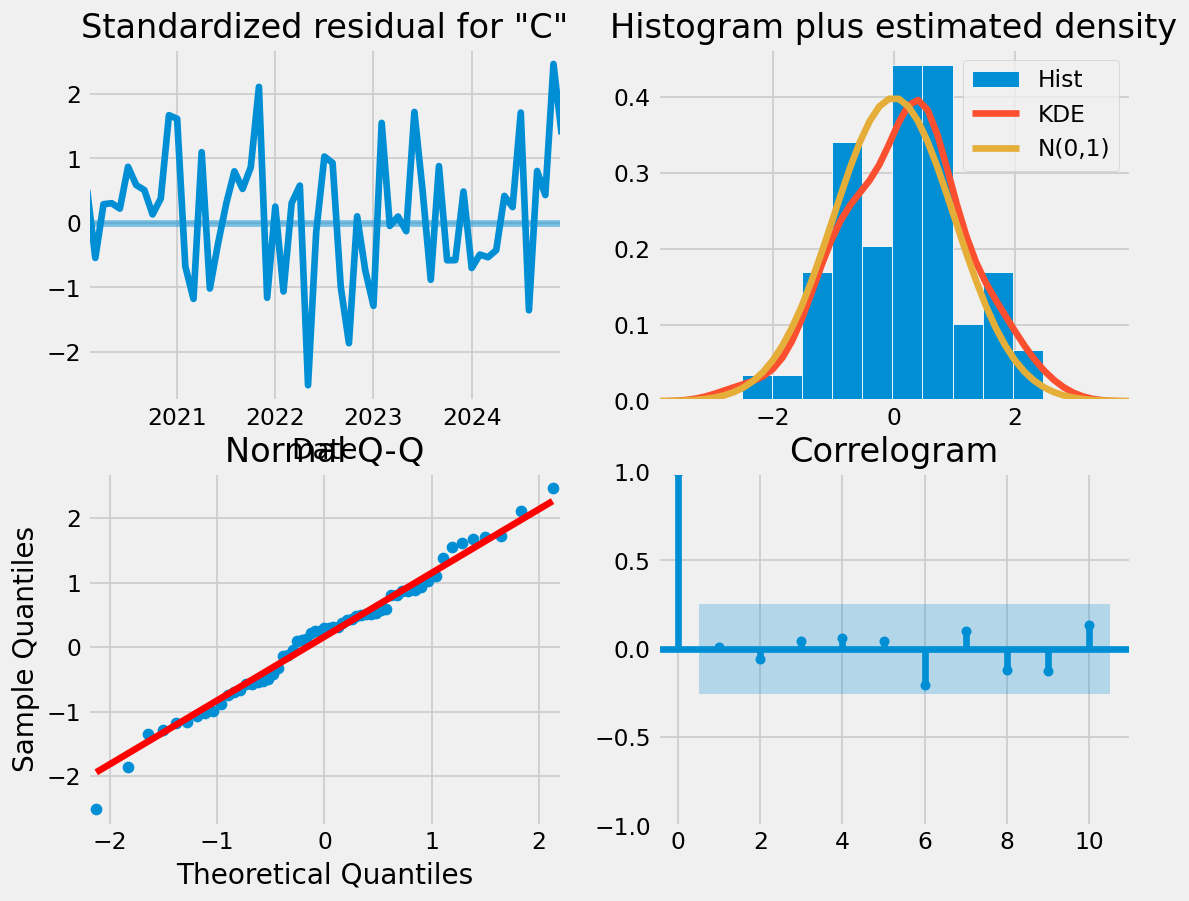

In [99]:
model_fit2.plot_diagnostics(figsize=(10,8))
plt.show()

## 2,1,4

In [100]:
model3 = ARIMA(Tsla1['Closing Price'], order=(2,1,4))
model_fit3 = model3.fit()
print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:          Closing Price   No. Observations:                   60
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -287.455
Date:                Mon, 27 Jan 2025   AIC                            588.910
Time:                        12:25:33   BIC                            603.453
Sample:                    01-01-2020   HQIC                           594.587
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4483      0.164     -8.835      0.000      -1.770      -1.127
ar.L2         -0.7460      0.143     -5.221      0.000      -1.026      -0.466
ma.L1          1.8949      0.640      2.961      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


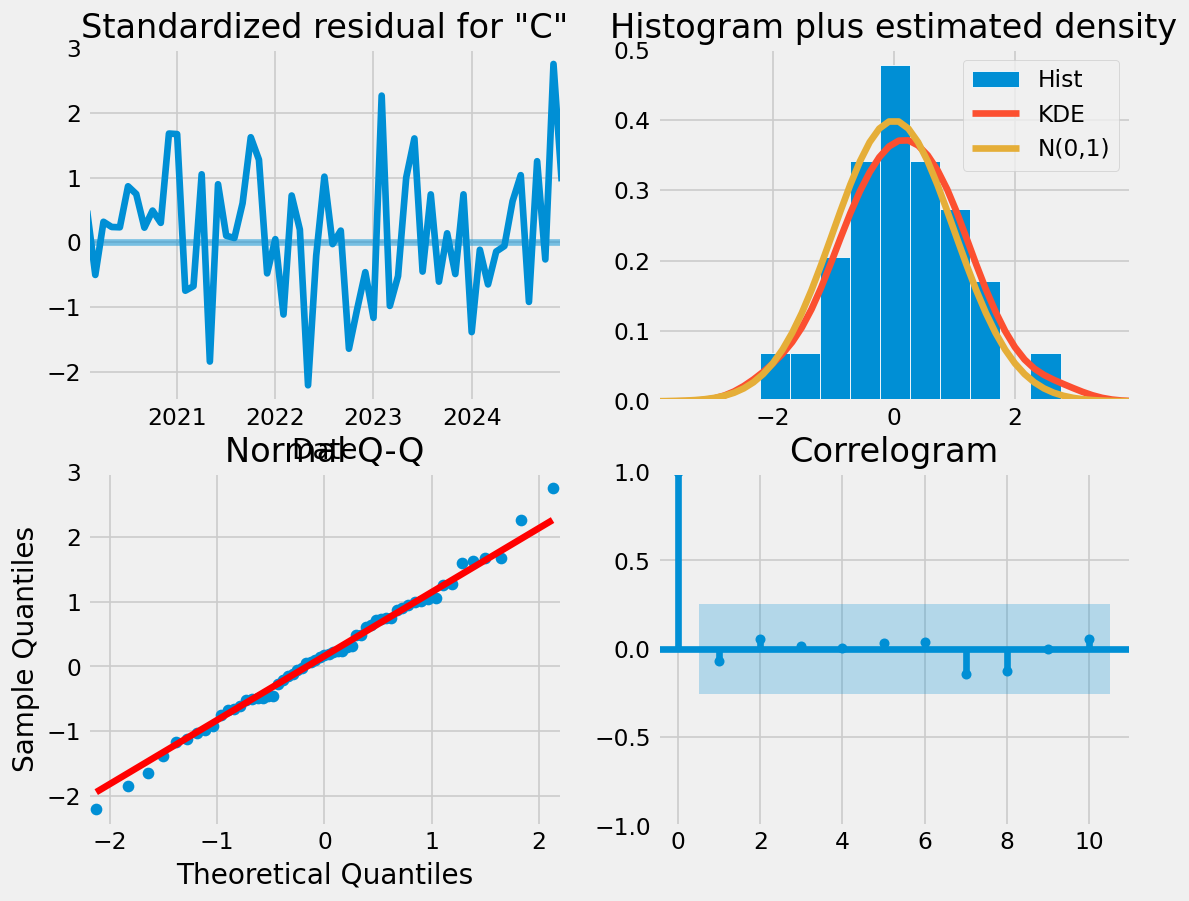

In [101]:
model_fit3.plot_diagnostics(figsize=(10,8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


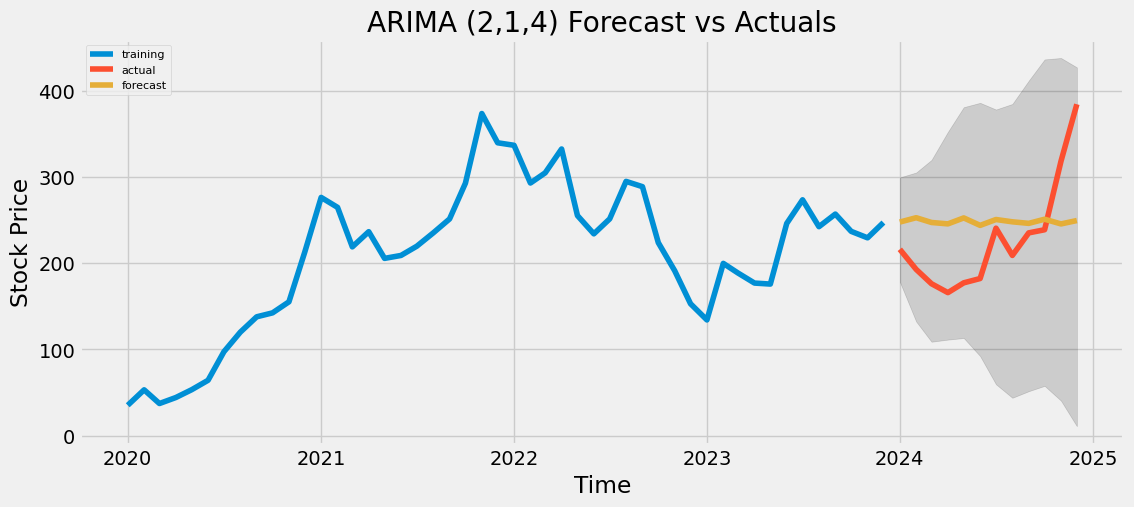

In [102]:
model3 = ARIMA(train, order=(2,1,4))  
fitted3 = model3.fit()  

# Forecast
fc3 = fitted3.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins3 = fitted3.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series3 = pd.Series(fc3, index=test.index)
lower_series3 = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series3 = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series3, label='forecast')
plt.fill_between(lower_series2.index, lower_series2, upper_series2, 
                 color='k', alpha=.15)
plt.title('ARIMA (2,1,4) Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [103]:
# Accuracy metrics order 2,1,4
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_metrics3 = forecast_accuracy(fc3, actual)
print(accuracy_metrics3)

{'mape': 0.250792864459039, 'me': 20.328107955876394, 'mae': 54.916731573397946, 'mpe': 0.15424503016192073, 'rmse': 65.07566400069314, 'corr': 0.022780735721679046, 'minmax': 0.199794032977043, 'acf1': 0.5554756378938515}


## Comparing performance

In [104]:
selected_arima1 = {key:accuracy_metrics1[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_arima2 = {key:accuracy_metrics2[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_arima3 = {key:accuracy_metrics3[key] for key in ['mape','mae','rmse','corr','minmax']}
print("Forecast Error 1,1,1:", selected_arima1)
print("Forecast Error 2,1,2:", selected_arima2)
print("Forecast Error 2,1,4:", selected_arima3)

Forecast Error 1,1,1: {'mape': 0.2654952175497963, 'mae': 57.48238456741482, 'rmse': 66.49772455766507, 'corr': 0.020167406109335085, 'minmax': 0.2082376316316844}
Forecast Error 2,1,2: {'mape': 0.2003515423740965, 'mae': 46.88794125876876, 'rmse': 64.05881491592582, 'corr': -0.09272995416241422, 'minmax': 0.16990754376771544}
Forecast Error 2,1,4: {'mape': 0.250792864459039, 'mae': 54.916731573397946, 'rmse': 65.07566400069314, 'corr': 0.022780735721679046, 'minmax': 0.199794032977043}


## Future Forecast 2025

In [105]:
start_forecast_date = "2025-01-01"
n_future_steps = 12  # Replace with your desired forecast horizon
future_dates = pd.date_range(start=start_forecast_date, periods=future_periods, freq="MS")

# Future Forecast
future_forecast_ar = fitted2.forecast(steps=n_future_steps, alpha=0.05)  # 95% confidence interval
future_conf_ins = fitted2.get_forecast(steps=n_future_steps).summary_frame()

# Convert forecast to pandas series
future_forecast_ar = pd.DataFrame({
    'Date': future_dates, 
    'Closing Price': future_forecast_ar})

# Set the 'Date' column as the index
future_forecast_ar.set_index('Date', inplace=True)

# Display the resulting DataFrame
print(future_forecast_ar)

            Closing Price
Date                     
2025-01-01     238.944592
2025-02-01     218.743780
2025-03-01     214.363800
2025-04-01     231.834585
2025-05-01     247.086340
2025-06-01     239.110903
2025-07-01     218.898931
2025-08-01     214.294079
2025-09-01     231.636077
2025-10-01     247.032507
2025-11-01     239.275868
2025-12-01     219.055416


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [106]:
future_dates

DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [107]:
#visualize future forecast 2025
plt.figure(figsize=(12, 5))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_ar, label="12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Stock Price - ARIMA Forecasting 2025 (2,1,2)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# SARIMA

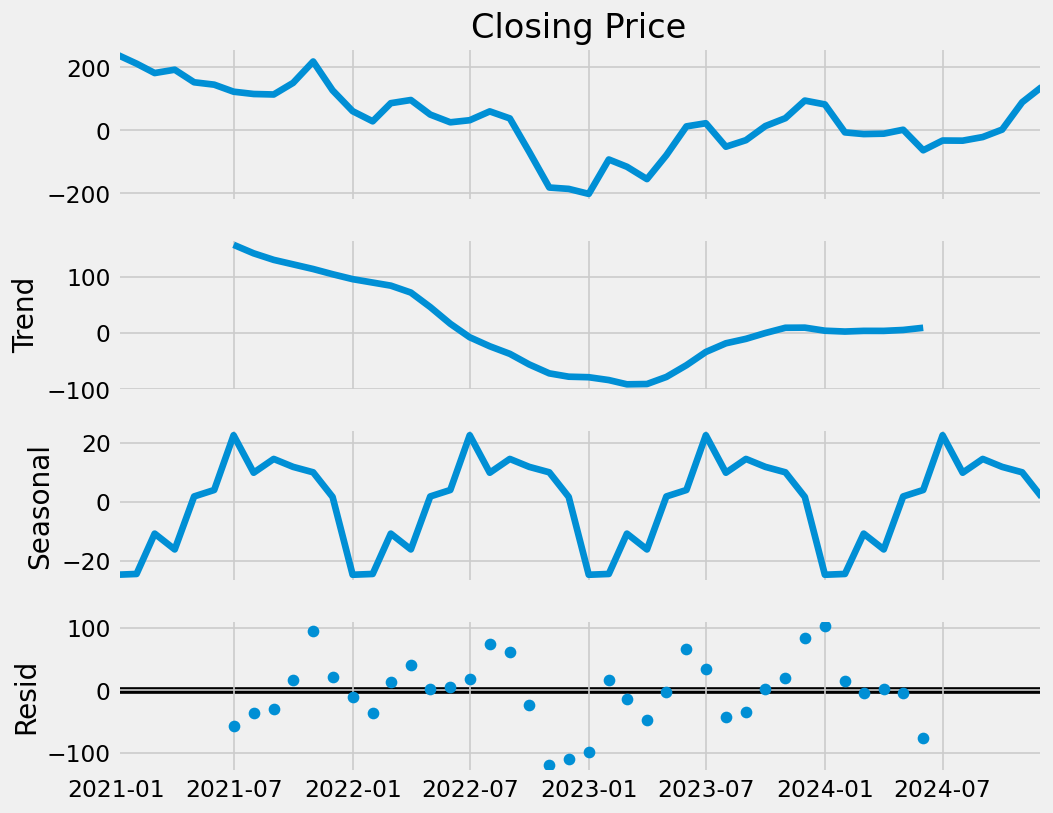

In [108]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

data_diff_seas = Tsla1['Closing Price'].diff(12).dropna()
dec = sm.tsa.seasonal_decompose(data_diff_seas,period = 12)
dec.plot()
plt.show()

## (1,1,1) (1,1,1,12) / (1,1,1) (1,1,1,16)

In [109]:
modsar1 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(1,1,1), seasonal_order=(1,1,1,12))
modsar1_fit = modsar1.fit()

modsar2 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(1,1,1), seasonal_order=(1,1,1,16))
modsar2_fit = modsar2.fit()

# Compare the results
print("Model 1 Summary (AIC, BIC):")
print(modsar1_fit.summary())

print("\nModel 2 Summary (AIC, BIC):")
print(modsar2_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting paramet

Model 1 Summary (AIC, BIC):
                                     SARIMAX Results                                      
Dep. Variable:                      Closing Price   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -242.477
Date:                            Mon, 27 Jan 2025   AIC                            494.954
Time:                                    12:25:39   BIC                            504.205
Sample:                                01-01-2020   HQIC                           498.435
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7860      0.278     -2.824      0.005      -1.332      -0.240
ma.L1  

In [110]:
#residual comparison 
# Residual diagnostics for Model 1
residuals1 = modsar1_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(residuals1)
ax[0].set_title("Model 1 Residuals")
sm.graphics.tsa.plot_acf(residuals1, lags=20, ax=ax[1])
ax[1].set_title("Model 1 ACF of Residuals")

# Residual diagnostics for Model 2
residuals2 = modsar2_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(residuals2)
ax[0].set_title("Model 2 Residuals")
sm.graphics.tsa.plot_acf(residuals2, lags=20, ax=ax[1])
ax[1].set_title("Model 2 ACF of Residuals")

Text(0.5, 1.0, 'Model 2 ACF of Residuals')

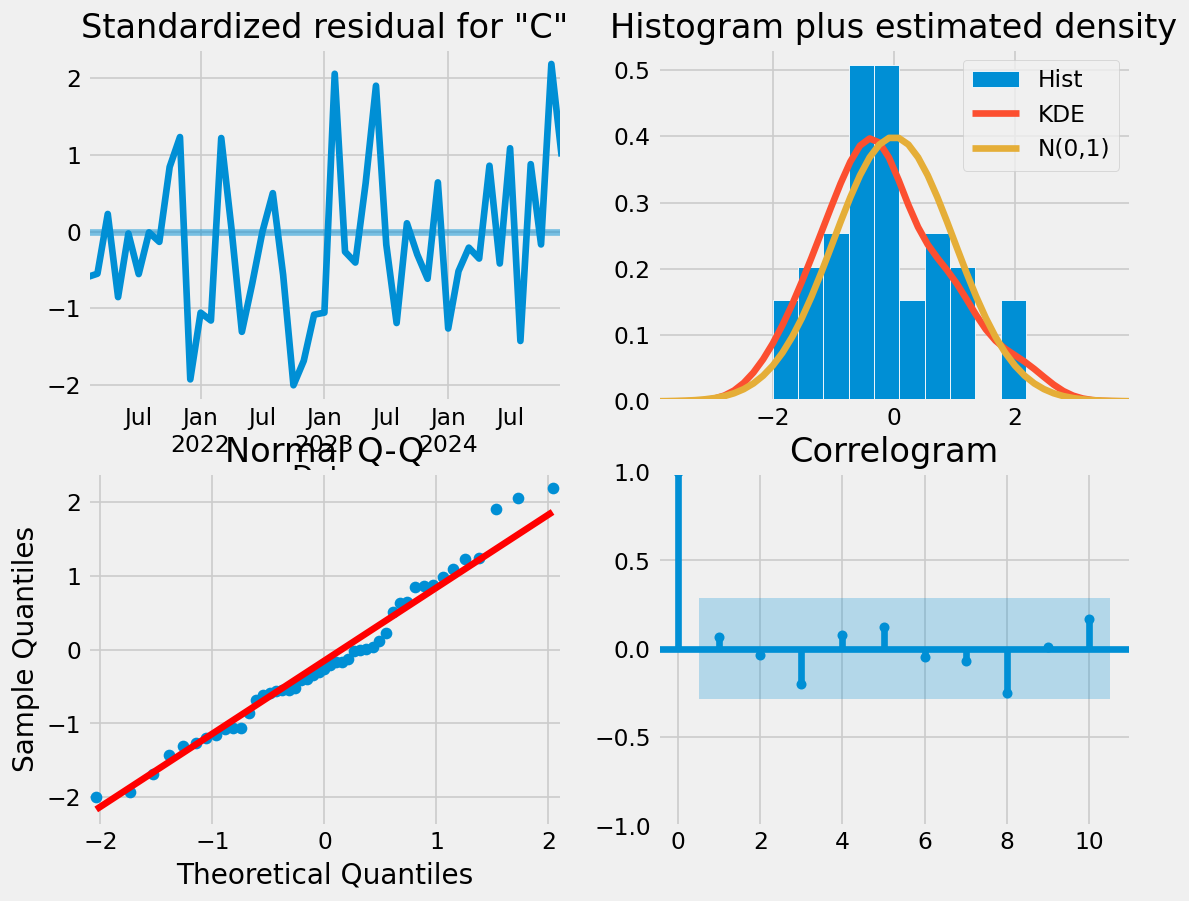

In [111]:
modsar1_fit.plot_diagnostics(figsize=(10,8))
plt.show()

modsar2_fit.plot_diagnostics(figsize=(10,8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


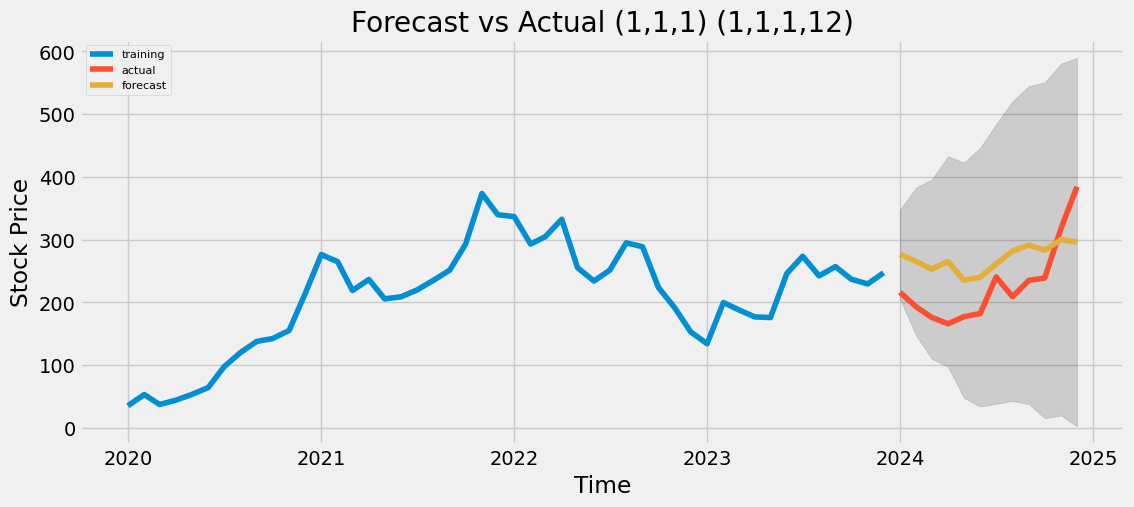

In [112]:
# SARIMA model (1,1,1) (1,1,1,12)
modsar1 = ARIMA(train, order=(1,1,1), seasonal_order=(1,1,1,12))
fitted_sar1 = modsar1.fit()  

# Forecast
fc_sar1 = fitted_sar1.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins1 = fitted_sar1.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series1 = pd.Series(fc_sar1, index=test.index)
lower_series = pd.Series(conf_ins1['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins1['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series1, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
plt.title('Forecast vs Actual (1,1,1) (1,1,1,12)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [113]:
# Forecast accuracy function (1,1,1) (1,1,1,12)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_sarima1 = forecast_accuracy(fc_sar1, actual)
print(accuracy_sarima1)

{'mape': 0.2899670778280326, 'me': 42.71687077971685, 'mae': 60.41837956403699, 'mpe': 0.24228419812653434, 'rmse': 64.74302724607256, 'corr': 0.7459966441704785, 'minmax': 0.21920474909496201, 'acf1': 0.41686483033968036}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


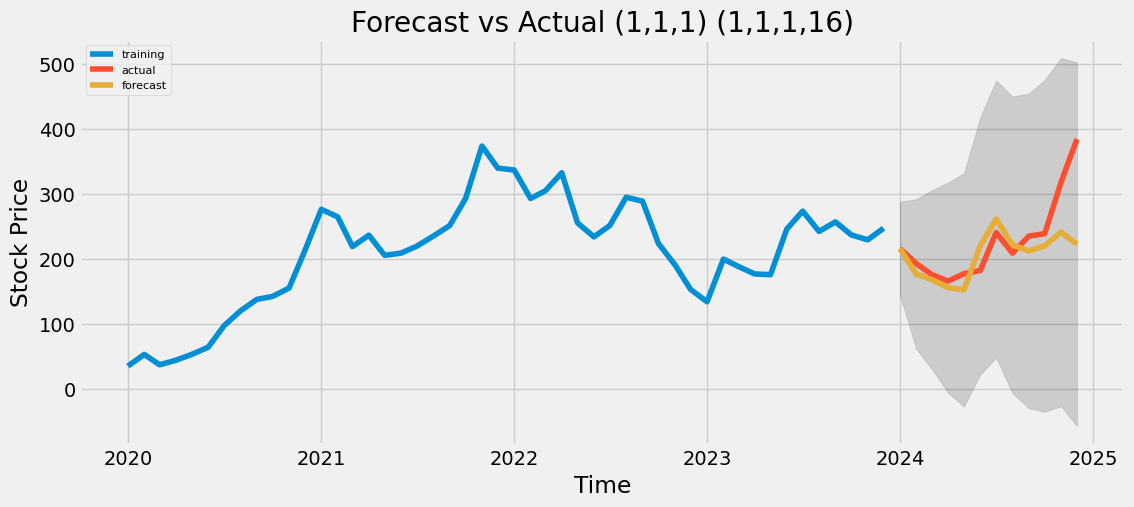

In [114]:
# Build the SARIMA model (1,1,1) (1,1,1,16)
modsar2 = ARIMA(train, order=(1,1,1), seasonal_order=(1,1,1,16))
fitted_sar2 = modsar2.fit()  

# Forecast
fc_sar2 = fitted_sar2.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins2 = fitted_sar2.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series2 = pd.Series(fc_sar2, index=test.index)
lower_series = pd.Series(conf_ins2['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins2['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series2, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual (1,1,1) (1,1,1,16)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [115]:
# Forecast accuracy function (1,1,1) (1,1,1,16)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_sarima2 = forecast_accuracy(fc_sar2, actual)
print(accuracy_sarima2)

{'mape': 0.12668060792008473, 'me': -22.313290497501487, 'mae': 34.17951872115747, 'mpe': -0.06766794084256848, 'rmse': 54.77552348156889, 'corr': 0.5903422136274669, 'minmax': 0.12285417770269458, 'acf1': 0.3906213431146275}


##  (1,1,1) (0,0,0,12) / (1,1,1) (0,1,1,18)

In [116]:
modsar7 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(1,1,1), 
                                    seasonal_order=(0,0,0,12))
modsar7_fit = modsar7.fit()

print("Model 7 Summary (AIC, BIC):")
print(modsar7_fit.summary())

Model 7 Summary (AIC, BIC):
                               SARIMAX Results                                
Dep. Variable:          Closing Price   No. Observations:                   60
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -292.525
Date:                Mon, 27 Jan 2025   AIC                            591.051
Time:                        12:25:44   BIC                            597.283
Sample:                    01-01-2020   HQIC                           593.484
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0538      0.721     -0.075      0.941      -1.466       1.359
ma.L1          0.2424      0.717      0.338      0.735      -1.163       1.648
sigma2      1185.1631   

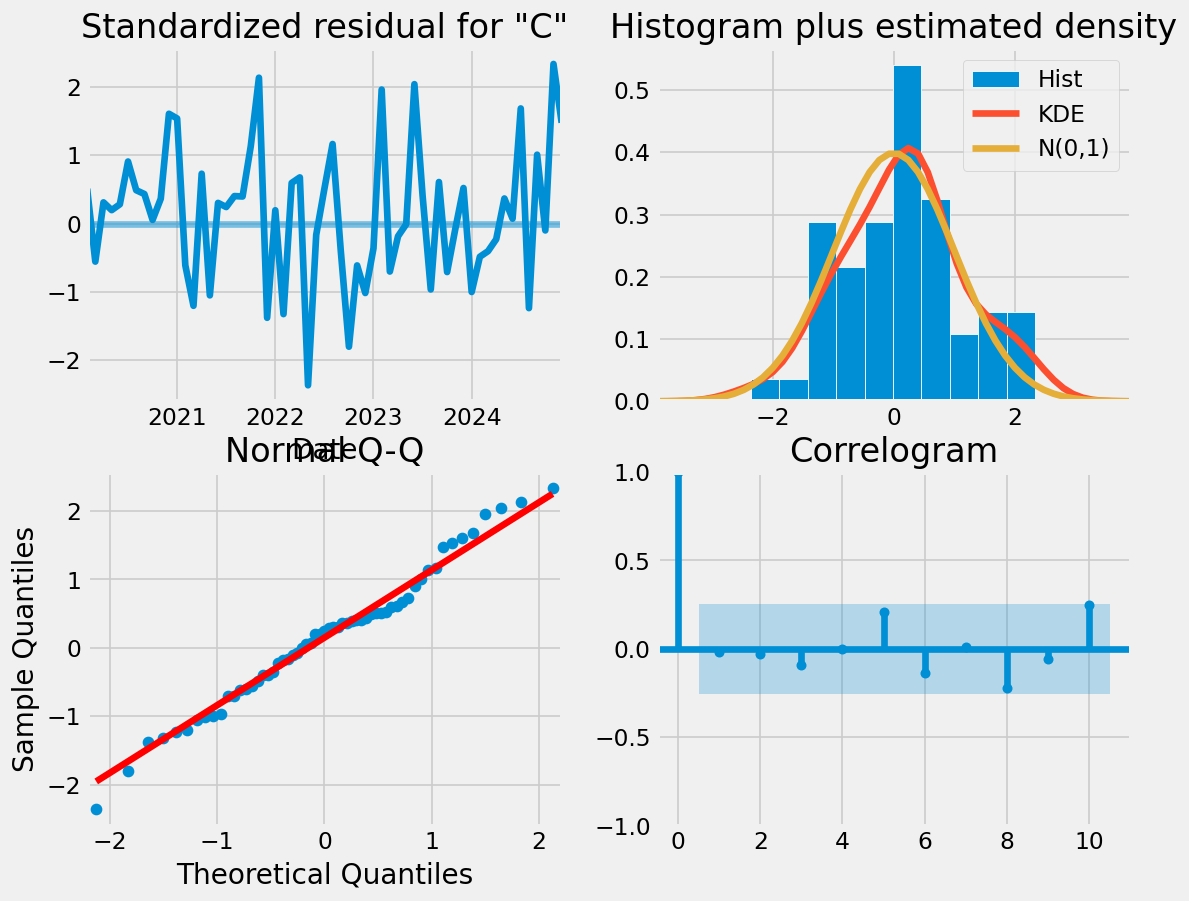

In [117]:
modsar7_fit.plot_diagnostics(figsize=(10,8))
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


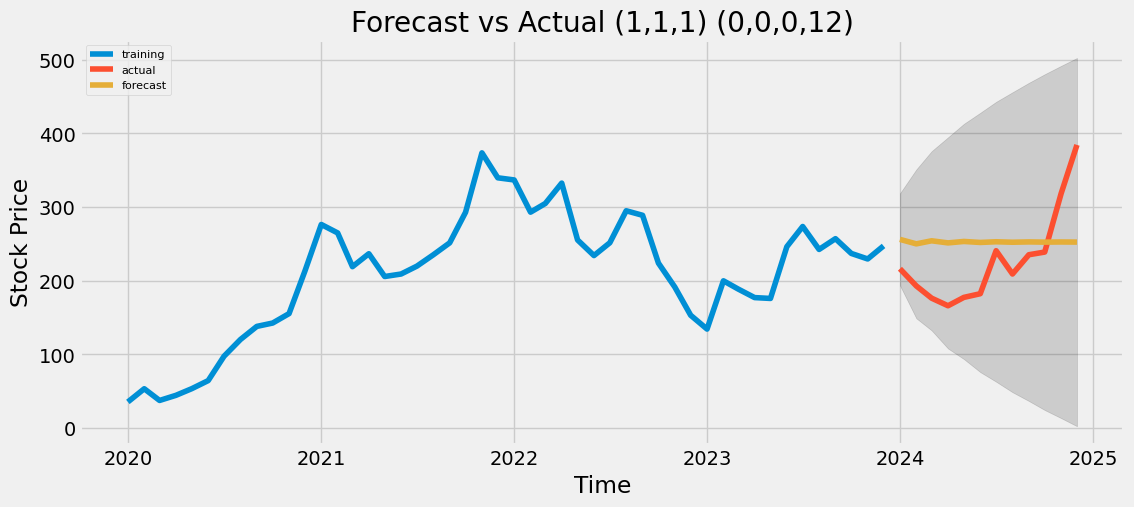

In [118]:
#SARIMA model (1,1,1) (0,0,0,12)
modsar7 = ARIMA(train, order=(1,1,1), seasonal_order=(0,0,0,12))
fitted_sar7 = modsar7.fit()  

#Forecast
fc_sar7 = fitted_sar7.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins7 = fitted_sar7.get_forecast(len(test)).summary_frame()

#Make as pandas series
fc_series7 = pd.Series(fc_sar7, index=test.index)
lower_series = pd.Series(conf_ins7['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins7['mean_ci_upper'], index=test.index)

#Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series7, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual (1,1,1) (0,0,0,12)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [119]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_sarima7 = forecast_accuracy(fc_sar7, actual)
print(accuracy_sarima7)

{'mape': 0.2654952175497963, 'me': 24.530544423196602, 'mae': 57.48238456741482, 'mpe': 0.17383135835814809, 'rmse': 66.49772455766507, 'corr': 0.020167406109335085, 'minmax': 0.2082376316316844, 'acf1': 0.5501199328214935}


In [120]:
# Model 2: SARIMAX (1,1,1) (1, 1, 1, 18)
modsar8 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(1,1,1), seasonal_order=(1,1,1,18))
modsar8_fit = modsar8.fit()

# Compare the results
print("Model 8 Summary (AIC, BIC):")
print(modsar8_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model 8 Summary (AIC, BIC):
                                     SARIMAX Results                                      
Dep. Variable:                      Closing Price   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 18)   Log Likelihood                -212.823
Date:                            Mon, 27 Jan 2025   AIC                            435.646
Time:                                    12:25:47   BIC                            444.214
Sample:                                01-01-2020   HQIC                           438.766
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9457      0.396      2.388      0.017       0.169       1.722
ma.L1  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


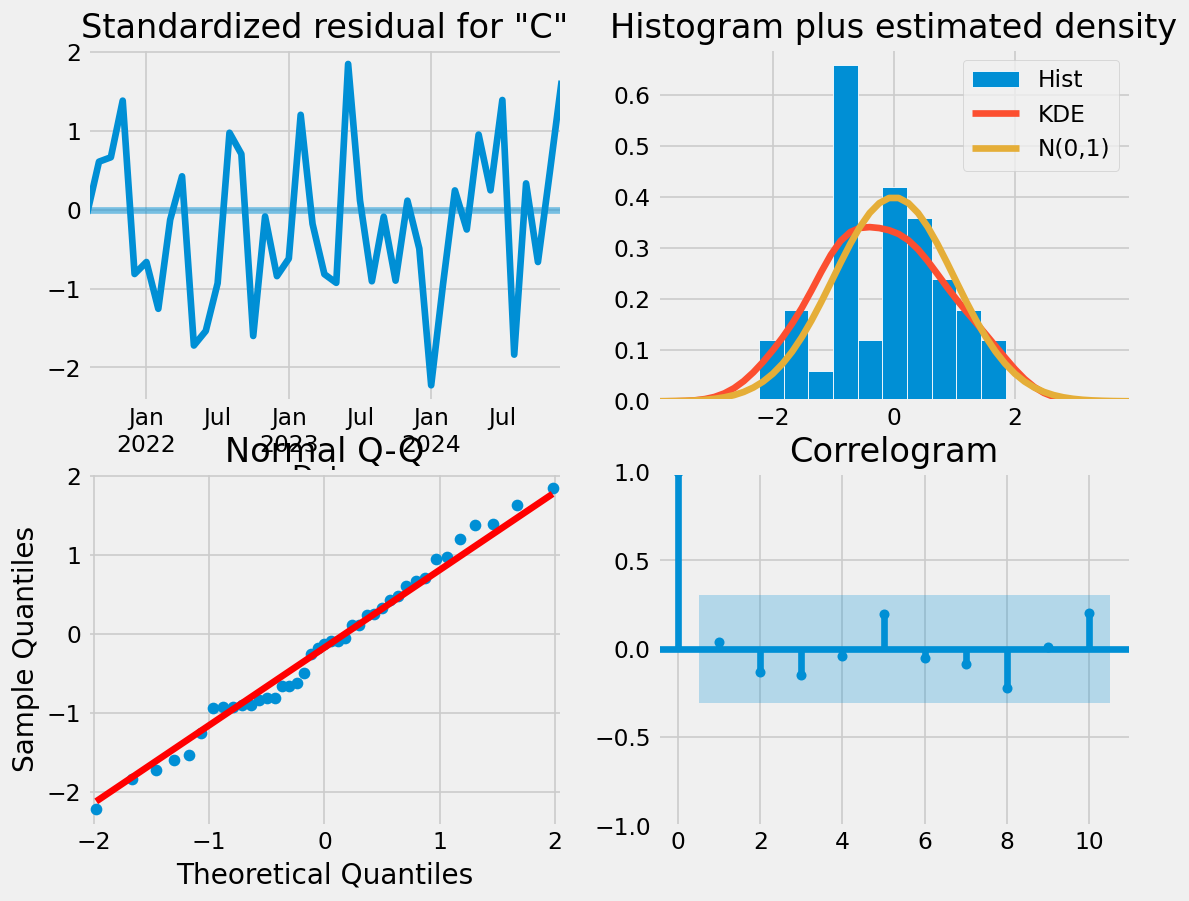

In [121]:
modsar8_fit.plot_diagnostics(figsize=(10,8))
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


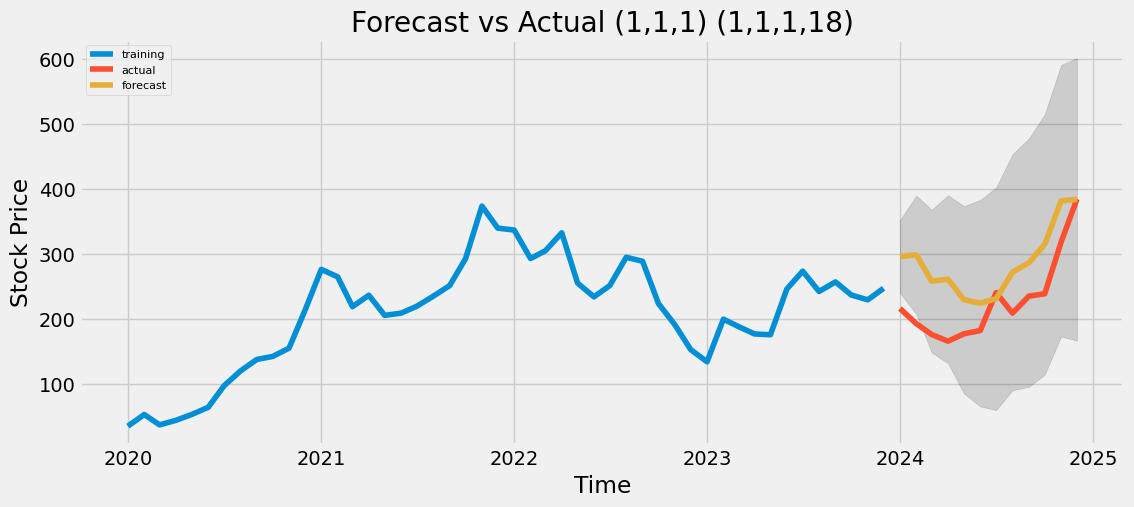

In [122]:
modsar8 = ARIMA(train, order=(1,1,1), seasonal_order=(1,1,1,18))
fitted_sar8 = modsar8.fit()  

# Forecast
fc_sar8 = fitted_sar8.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins8 = fitted_sar8.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series8 = pd.Series(fc_sar8, index=test.index)
lower_series = pd.Series(conf_ins8['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins8['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series8, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual (1,1,1) (1,1,1,18)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [123]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

accuracy_sarima8 = forecast_accuracy(fc_sar8, actual)
print(accuracy_sarima8)

{'mape': 0.2968551799733279, 'me': 58.44141108473902, 'mae': 60.08759155036601, 'mpe': 0.2900979391152896, 'rmse': 67.31597279585075, 'corr': 0.8415168861356218, 'minmax': 0.2151074215843548, 'acf1': 0.2481142793708475}


## (1,1,1)  (1,1,1,3) / ((1,1,1)  (1,1,1,6)

In [124]:
modsar5 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(1,1,1), seasonal_order=(1,1,1,3))
modsar5_fit = modsar5.fit()
print("Model 5 Summary (AIC, BIC):")
print(modsar5_fit.summary())

modsar6 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(1,1,1), seasonal_order=(1,1,1,6))
modsar6_fit = modsar6.fit()
print("Model 6 Summary (AIC, BIC):")
print(modsar6_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Model 5 Summary (AIC, BIC):
                                     SARIMAX Results                                     
Dep. Variable:                     Closing Price   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 3)   Log Likelihood                -283.549
Date:                           Mon, 27 Jan 2025   AIC                            577.098
Time:                                   12:25:51   BIC                            587.225
Sample:                               01-01-2020   HQIC                           581.024
                                    - 12-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9961      4.157      0.240      0.811      -7.151       9.143
ma.L1         -

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


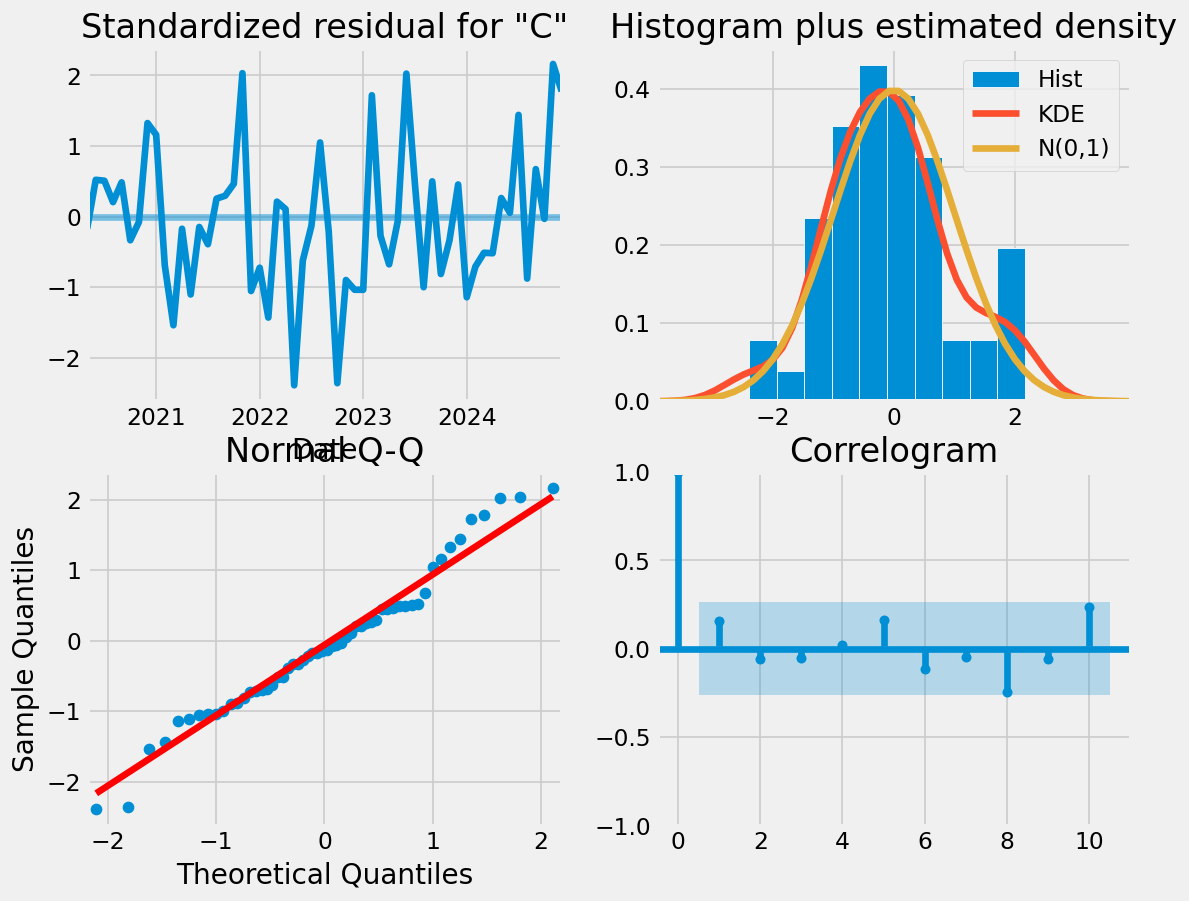

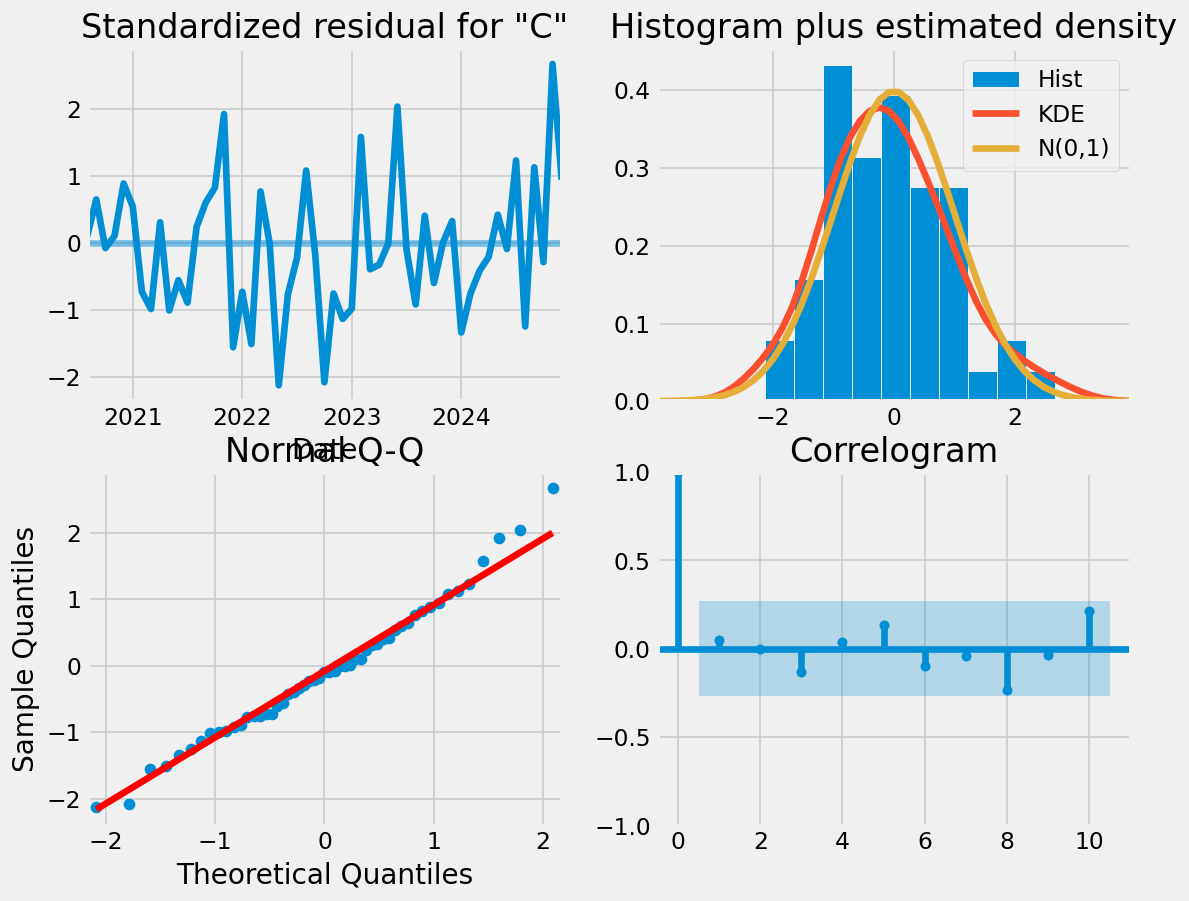

In [125]:
modsar5_fit.plot_diagnostics(figsize=(10,8))
plt.show()

modsar6_fit.plot_diagnostics(figsize=(10,8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


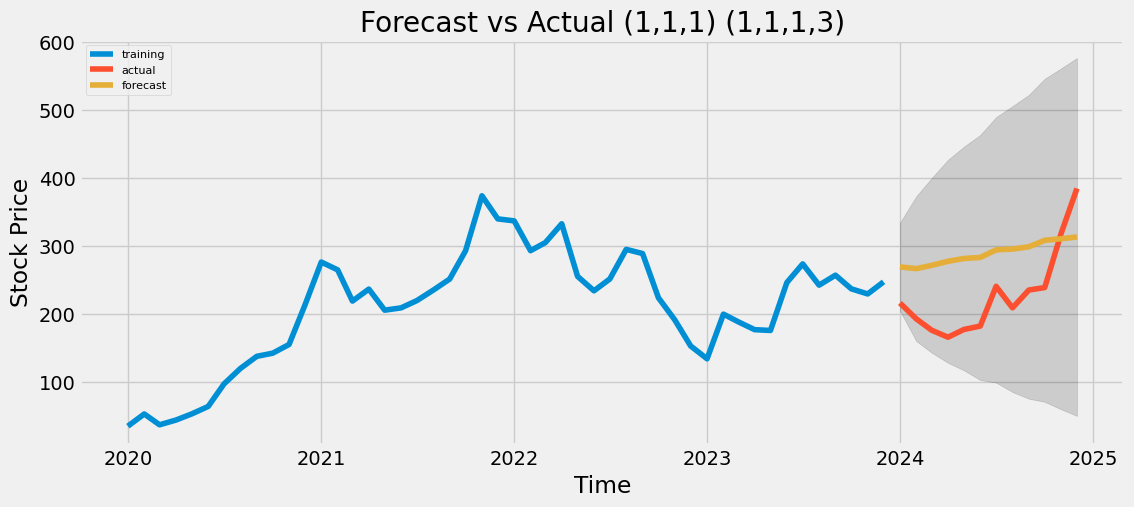

In [126]:
modsar5 = ARIMA(train, order=(1,1,1), seasonal_order=(1,1,1,3))
fitted_sar5 = modsar5.fit()  

# Forecast
fc_sar5 = fitted_sar5.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins5 = fitted_sar5.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series5 = pd.Series(fc_sar5, index=test.index)
lower_series = pd.Series(conf_ins5['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins5['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series5, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual (1,1,1) (1,1,1,3)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [127]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_sarima5 = forecast_accuracy(fc_sar5, actual)
print(accuracy_sarima5)

{'mape': 0.3657101932910145, 'me': 61.02882897021203, 'mae': 74.20437226817523, 'mpe': 0.3307204935143511, 'rmse': 79.10356280499084, 'corr': 0.7871339052948662, 'minmax': 0.2562813394809895, 'acf1': 0.4633847708392656}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


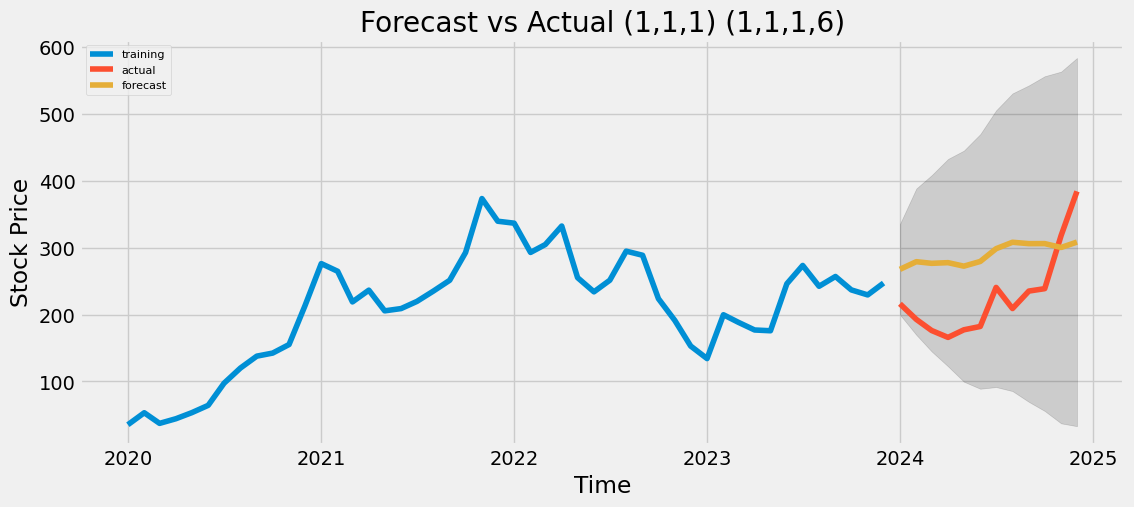

In [128]:
modsar6 = ARIMA(train, order=(1,1,1), seasonal_order=(1,1,1,6))
fitted_sar6 = modsar6.fit()  

# Forecast
fc_sar6 = fitted_sar6.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins6 = fitted_sar6.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series6 = pd.Series(fc_sar6, index=test.index)
lower_series = pd.Series(conf_ins6['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins6['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series6, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual (1,1,1) (1,1,1,6)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [129]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_sarima6 = forecast_accuracy(fc_sar6, actual)
print(accuracy_sarima6)

{'mape': 0.3795111409784606, 'me': 62.02506496971204, 'mae': 77.6457190406242, 'mpe': 0.337257279074123, 'rmse': 81.68290010177817, 'corr': 0.655896927858942, 'minmax': 0.2655255832118627, 'acf1': 0.4744533269115885}


## (2,1,2) (0,1,1,12) / (2,1,2) (0,1,1,16)

In [130]:
# Fit the SARIMA model (2,1,2) (0, 1, 1, 12)
modsar3 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(2,1,2), seasonal_order=(0,1,1,12))
modsar3_fit = modsar3.fit()

# Model 2: SARIMAX (2,1,2) (0, 1, 1, 16)
modsar4 = sm.tsa.statespace.SARIMAX(Tsla1['Closing Price'], order=(2,1,2), seasonal_order=(0,1,1,16))
modsar4_fit = modsar4.fit()

# Compare the results
print("Model 3 Summary (AIC, BIC):")
print(modsar3_fit.summary())

print("\nModel 4 Summary (AIC, BIC):")
print(modsar4_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting paramet

Model 3 Summary (AIC, BIC):
                                      SARIMAX Results                                       
Dep. Variable:                        Closing Price   No. Observations:                   60
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -240.548
Date:                              Mon, 27 Jan 2025   AIC                            493.097
Time:                                      12:25:58   BIC                            504.198
Sample:                                  01-01-2020   HQIC                           497.274
                                       - 12-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4267      0.122      3.510      0.000       0.188    

In [131]:
print(modsar4_fit.params)  # Model parameters
#print(modsar3_fit.seasonal_order)  # Seasonal parameters

ar.L1          1.887952
ar.L2         -0.913771
ma.L1         -1.963767
ma.L2          0.999486
ma.S.L16      -0.998936
sigma2      1001.162087
dtype: float64


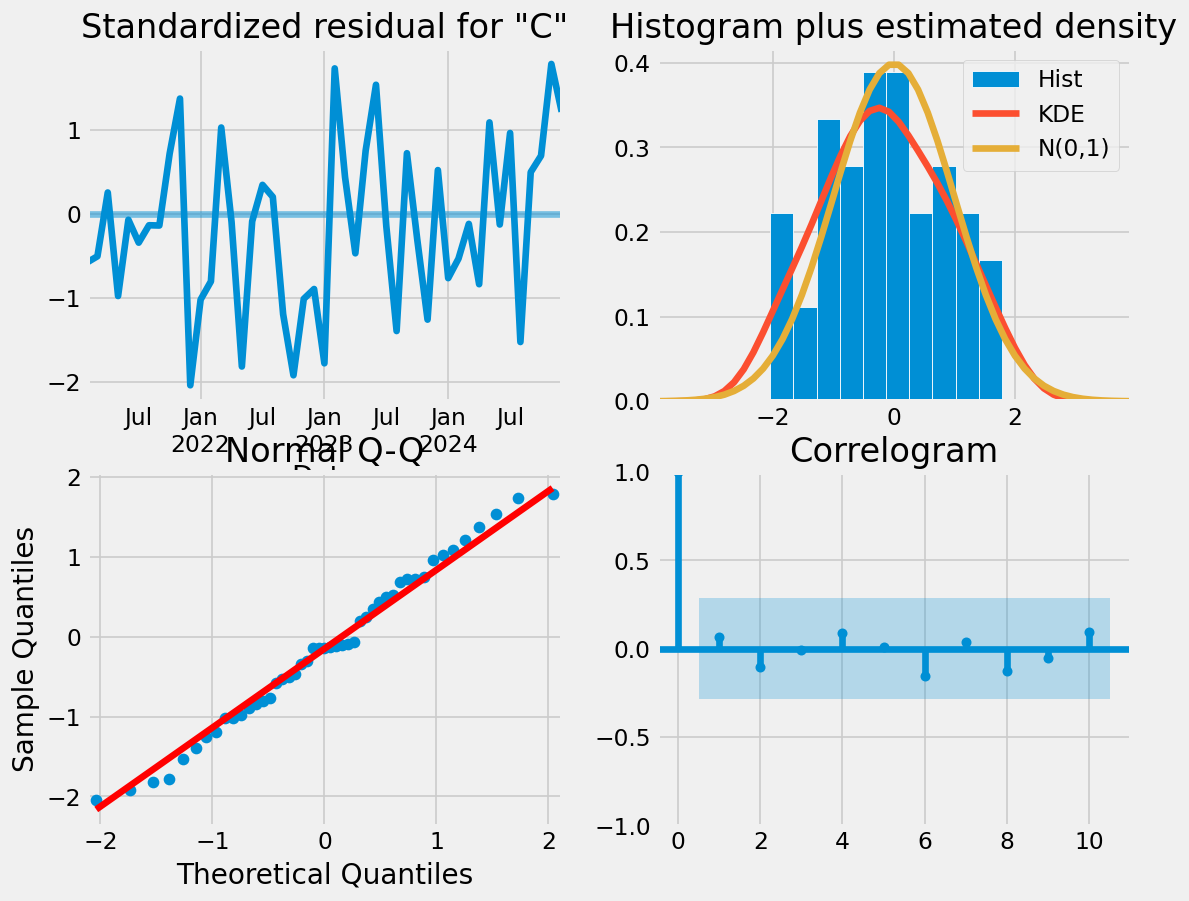

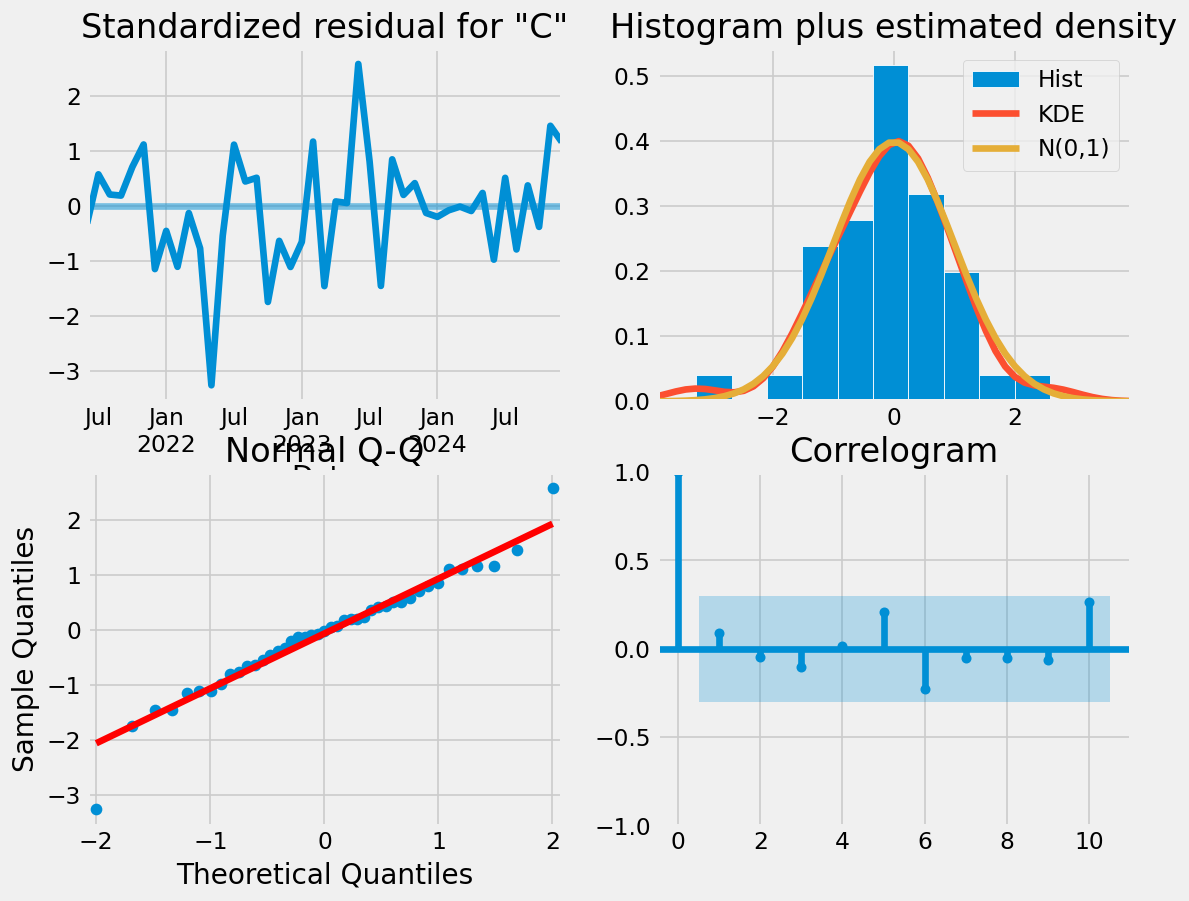

In [132]:
modsar3_fit.plot_diagnostics(figsize=(10,8))
plt.show()

modsar4_fit.plot_diagnostics(figsize=(10,8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


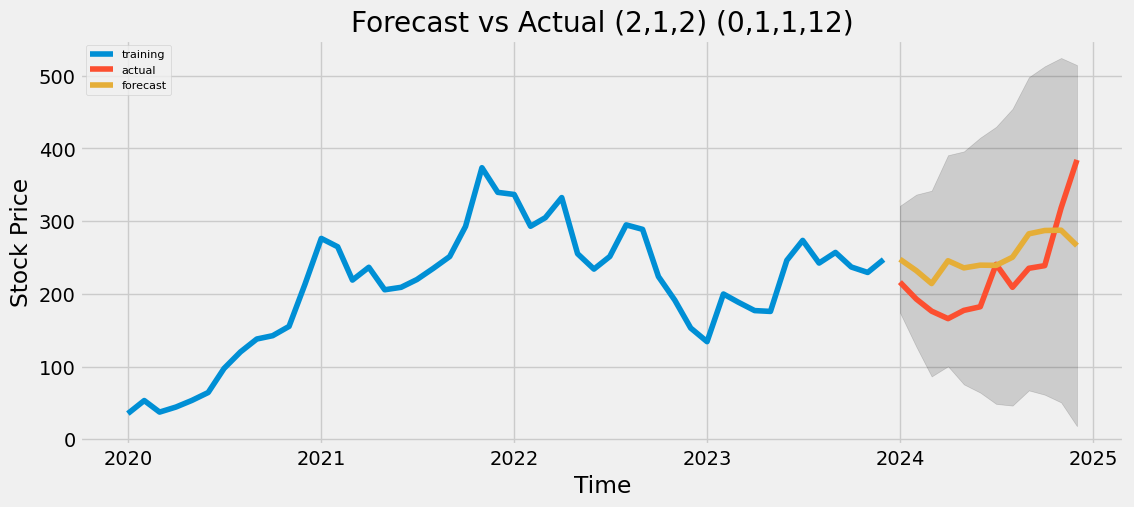

In [133]:
# Build the SARIMA model (2,1,2) (0,1,1,12)
modsar3 = ARIMA(train, order=(2,1,2), seasonal_order=(0,1,1,12))
fitted_sar3 = modsar3.fit()  


# Forecast
fc_sar3 = fitted_sar3.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins3 = fitted_sar3.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series3 = pd.Series(fc_sar3, index=test.index)
lower_series = pd.Series(conf_ins3['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins3['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series3, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual (2,1,2) (0,1,1,12)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [134]:
# SARIMA model (2,1,2) (0,1,1,12)
# Forecast accuracy function
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_sarima3 = forecast_accuracy(fc_sar3, actual)
print(accuracy_sarima3)

{'mape': 0.22496964035356645, 'me': 24.24714002526215, 'mae': 49.26115186625814, 'mpe': 0.15674704221332636, 'rmse': 56.39256222459571, 'corr': 0.6228419304675553, 'minmax': 0.18294501084375325, 'acf1': 0.3295068258157296}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


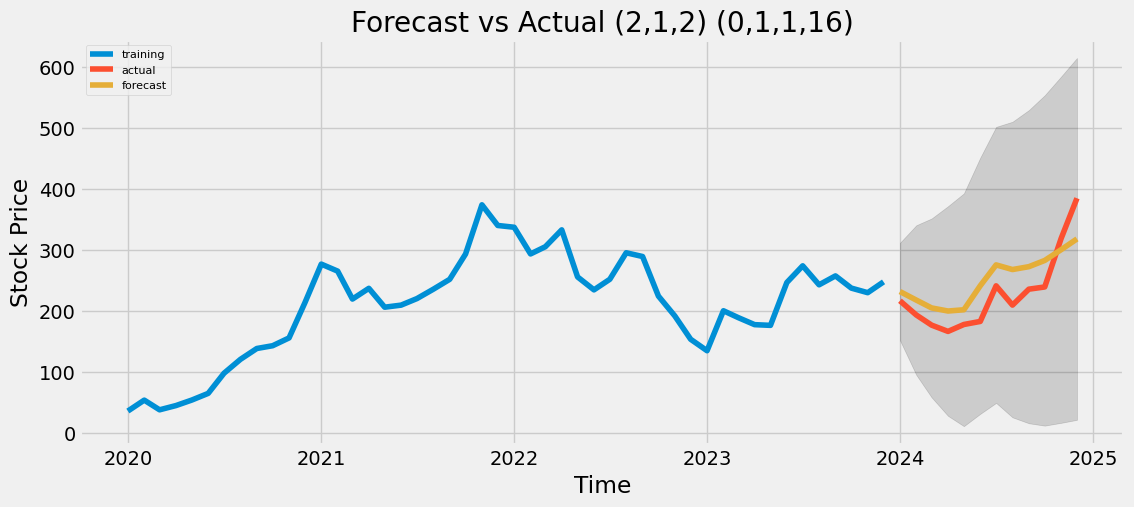

In [135]:
# Build the SARIMA model (2,1,2) (0,1,1,16)
modsar4 = ARIMA(train, order=(2,1,2), seasonal_order=(0,1,1,16))
fitted_sar4 = modsar4.fit()  

# Forecast
fc_sar4 = fitted_sar4.forecast(len(test), alpha=0.05)  # 95% conf
conf_ins4 = fitted_sar4.get_forecast(len(test)).summary_frame()

# Make as pandas series
fc_series4 = pd.Series(fc_sar4, index=test.index)
lower_series = pd.Series(conf_ins4['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins4['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series4, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual (2,1,2) (0,1,1,16)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [136]:
# SARIMA model (2,1,2) (0,1,1,16)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                            # ME
    mae = np.mean(np.abs(forecast - actual))                   # MAE
    mpe = np.mean((forecast - actual) / actual)                # MPE
    rmse = np.sqrt(np.mean((forecast - actual) ** 2))          # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]                 # Correlation
    mins = np.amin(np.vstack([forecast, actual]), axis=0)
    maxs = np.amax(np.vstack([forecast, actual]), axis=0)
    minmax = 1 - np.mean(mins / maxs)                          # Minmax
    # Optionally include ACF if desired
    acf1 = acf(forecast - actual, fft=True)[1]
    return {
        'mape': mape,
        'me': me,
        'mae': mae,
        'mpe': mpe,
        'rmse': rmse,
        'corr': corr,
        'minmax': minmax,
        'acf1': acf1
    }

# Call the function
accuracy_sarima4 = forecast_accuracy(fc_sar4, actual)
print(accuracy_sarima4)

{'mape': 0.16737208086246302, 'me': 22.671284679156745, 'mae': 36.840931640870096, 'mpe': 0.12885389092954355, 'rmse': 40.18729831978917, 'corr': 0.8811792463336343, 'minmax': 0.14258622087469375, 'acf1': 0.3462559446154597}


Text(0.5, 1.0, 'Model 4 ACF of Residuals')

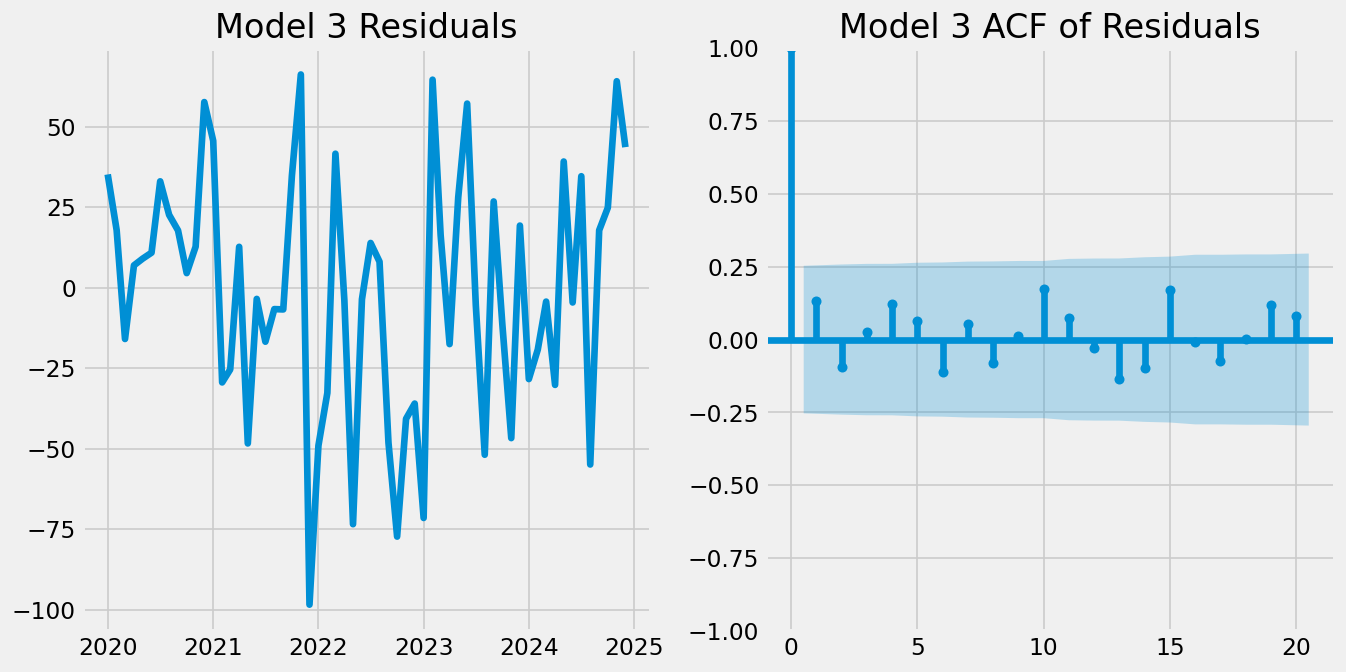

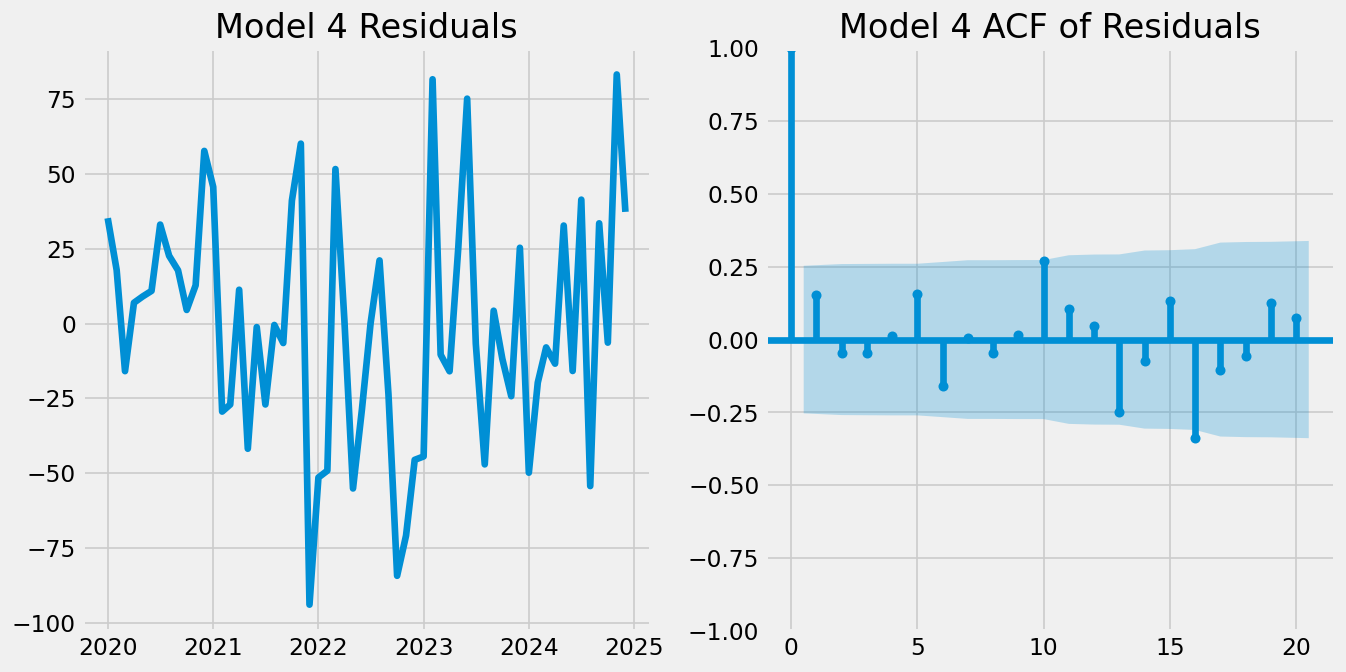

In [137]:
#residual comparison 
# Residual diagnostics for Model 3
residuals3 = modsar3_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(residuals3)
ax[0].set_title("Model 3 Residuals")
sm.graphics.tsa.plot_acf(residuals3, lags=20, ax=ax[1])
ax[1].set_title("Model 3 ACF of Residuals")

# Residual diagnostics for Model 4
residuals4 = modsar4_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(residuals1)
ax[0].set_title("Model 4 Residuals")
sm.graphics.tsa.plot_acf(residuals4, lags=20, ax=ax[1])
ax[1].set_title("Model 4 ACF of Residuals")

## Comparing Performance

In [138]:
#comparing SARIMA models errors
selected_sarima1 = {key:accuracy_sarima1[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_sarima2 = {key:accuracy_sarima2[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_sarima3 = {key:accuracy_sarima3[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_sarima4 = {key:accuracy_sarima4[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_sarima5 = {key:accuracy_sarima5[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_sarima6 = {key:accuracy_sarima6[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_sarima7 = {key:accuracy_sarima7[key] for key in ['mape','mae','rmse','corr','minmax']}
selected_sarima8 = {key:accuracy_sarima8[key] for key in ['mape','mae','rmse','corr','minmax']}
print("Forecast Error (1,1,1)(1,1,1,12):", selected_sarima1)
print("Forecast Error (1,1,1)(1,1,1,16):", selected_sarima2)
print("Forecast Error (2,1,2)(0,1,1,12):", selected_sarima3)
print("Forecast Error (2,1,2)(0,1,1,16):", selected_sarima4)
print("Forecast Error (1,1,1)(1,1,1,3):", selected_sarima5)
print("Forecast Error (1,1,1)(1,1,1,6):", selected_sarima6)
print("Forecast Error (1,1,1)(0,0,0,12):", selected_sarima7)
print("Forecast Error (1,1,1)(1,1,1,18):", selected_sarima8)

Forecast Error (1,1,1)(1,1,1,12): {'mape': 0.2899670778280326, 'mae': 60.41837956403699, 'rmse': 64.74302724607256, 'corr': 0.7459966441704785, 'minmax': 0.21920474909496201}
Forecast Error (1,1,1)(1,1,1,16): {'mape': 0.12668060792008473, 'mae': 34.17951872115747, 'rmse': 54.77552348156889, 'corr': 0.5903422136274669, 'minmax': 0.12285417770269458}
Forecast Error (2,1,2)(0,1,1,12): {'mape': 0.22496964035356645, 'mae': 49.26115186625814, 'rmse': 56.39256222459571, 'corr': 0.6228419304675553, 'minmax': 0.18294501084375325}
Forecast Error (2,1,2)(0,1,1,16): {'mape': 0.16737208086246302, 'mae': 36.840931640870096, 'rmse': 40.18729831978917, 'corr': 0.8811792463336343, 'minmax': 0.14258622087469375}
Forecast Error (1,1,1)(1,1,1,3): {'mape': 0.3657101932910145, 'mae': 74.20437226817523, 'rmse': 79.10356280499084, 'corr': 0.7871339052948662, 'minmax': 0.2562813394809895}
Forecast Error (1,1,1)(1,1,1,6): {'mape': 0.3795111409784606, 'mae': 77.6457190406242, 'rmse': 81.68290010177817, 'corr': 0

## Future Forecast 2025

In [139]:
start_forecast_date = "2025-01-01"
n_future_steps = 12  # Replace with your desired forecast horizon
future_dates = pd.date_range(start=start_forecast_date, periods=future_periods, freq="MS")

# Future Forecast
future_forecast_sar = fitted_sar4.forecast(steps=n_future_steps, alpha=0.05)  # 95% confidence interval
future_conf_ins = fitted_sar4.get_forecast(steps=n_future_steps).summary_frame()

# Convert forecast to pandas series
future_forecast_sar = pd.DataFrame({
    'Date': future_dates, 
    'Closing Price': future_forecast_sar})

# Set the 'Date' column as the index
future_forecast_sar.set_index('Date', inplace=True)

# Display the resulting DataFrame
print(future_forecast_sar)

            Closing Price
Date                     
2025-01-01     231.274390
2025-02-01     217.249039
2025-03-01     204.375156
2025-04-01     199.314490
2025-05-01     201.368605
2025-06-01     240.784996
2025-07-01     274.984216
2025-08-01     267.357573
2025-09-01     272.070472
2025-10-01     282.276361
2025-11-01     299.923938
2025-12-01     317.589181


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


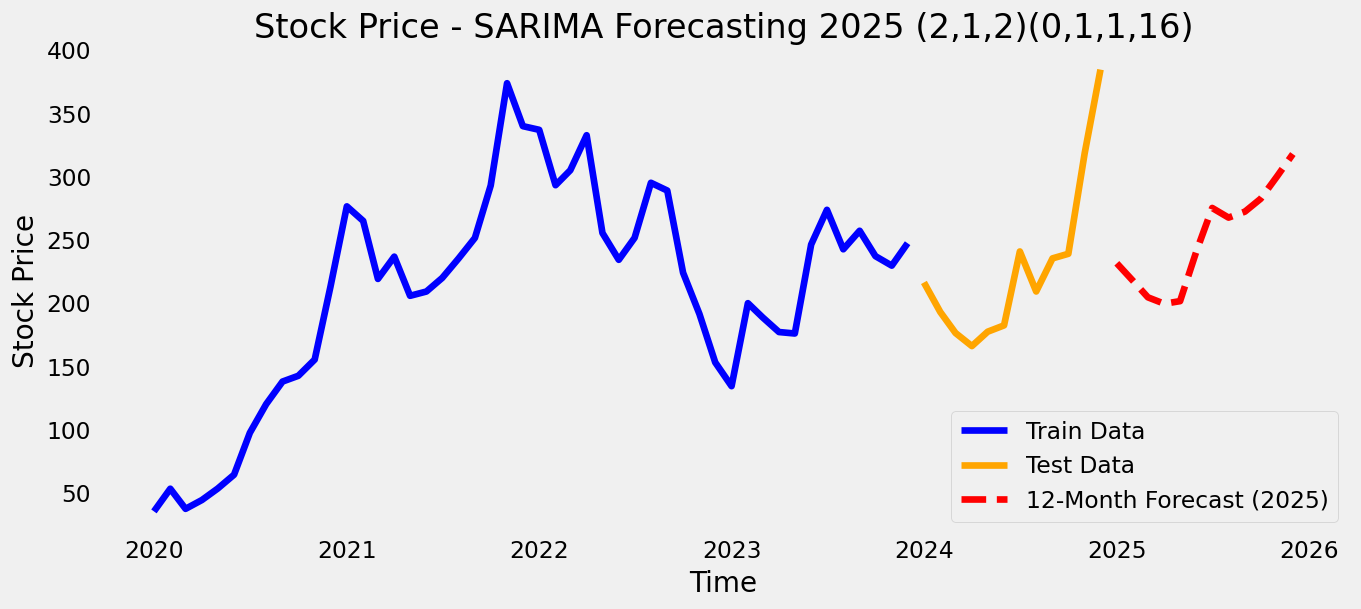

In [140]:
plt.figure(figsize=(12, 5))
plt.plot(train['Closing Price'], label="Train Data", color="blue")
plt.plot(test['Closing Price'], label="Test Data", color="orange")
plt.plot(future_forecast_sar, label="12-Month Forecast (2025)", linestyle="--", color="red")

plt.title("Stock Price - SARIMA Forecasting 2025 (2,1,2)(0,1,1,16)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

## residual testing

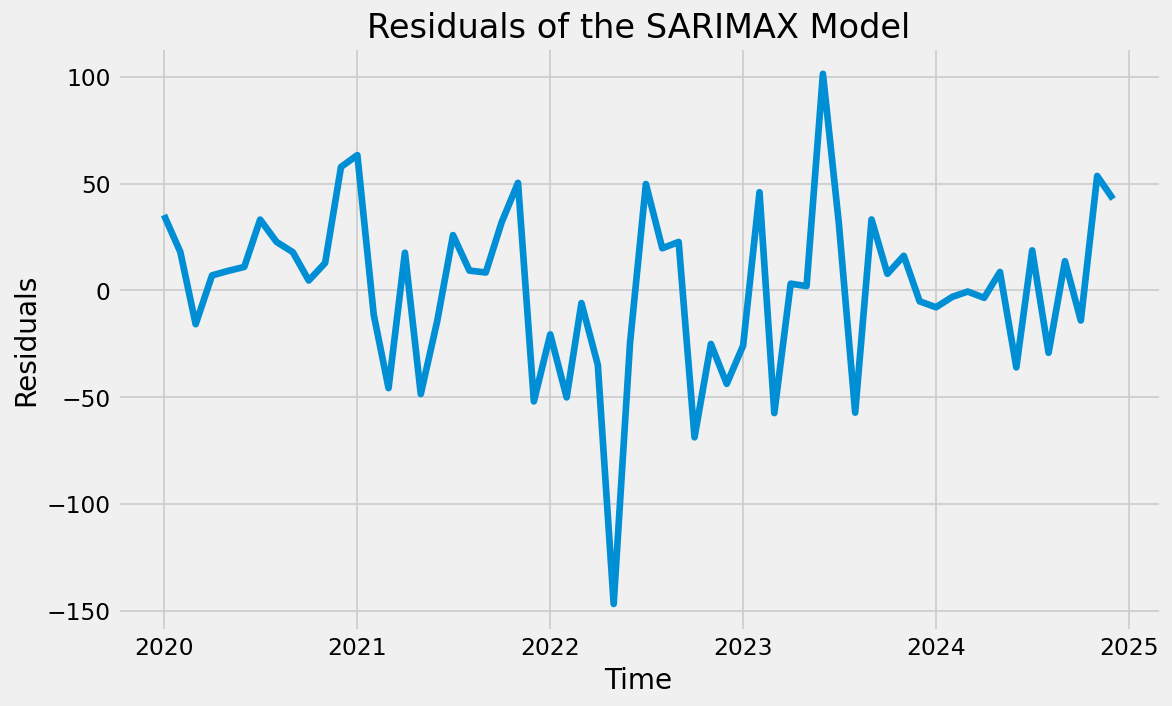

In [141]:
# Extract residuals
residuals = modsar4_fit.resid
import matplotlib.pyplot as plt

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()